#Climate Data Analysis

In [ ]:
!pip install requests-html

#Importing met office data

In [2]:
import requests

In [3]:
base_site1 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/ranked/UK.txt"

response1 = requests.get(base_site1)
response1

<Response [200]>

In [4]:
txt1 = response1.content
txt1[:100]

b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

#Data Preprocessing

Converting file to txt

In [5]:
with open('UK_mean_temp.txt', 'wb') as file:
  file.write(txt1)
  file.close()

In [6]:
with open('UK_mean_temp.txt', 'r') as file:
  UK_mean_temp_text = file.readlines()[5:]
  file.close()

Converting text so it would load in, in the correct format

In [ ]:
UK_mean_temp_text2 = ''

for line in UK_mean_temp_text:
  UK_mean_temp_text2 += f'{line}'

UK_mean_temp_text2 = UK_mean_temp_text2.replace('  ', ' ')
UK_mean_temp_text2 = UK_mean_temp_text2.replace('  ', ' ')
UK_mean_temp_text2 = UK_mean_temp_text2.replace('  ', ' ')
print(UK_mean_temp_text2)

In [8]:
with open('UK_mean_temp.txt', 'w') as file:
  file.write(UK_mean_temp_text2)
  file.close()

Importing txt file to dataframe

In [9]:
import pandas as pd

UK_mean_temp_data = pd.read_csv('UK_mean_temp.txt', sep=' ')

In [10]:
UK_mean_temp_data.head(10)

,Unnamed: 0,jan,year,feb,year.1,mar,year.2,apr,year.3,may,...,win,year.12,spr,year.13,sum,year.14,aut,year.15,ann,year.16
0,NaN,6.3,1916,6.8,1998,8.0,1938,10.7,2011,12.1,...,5.79,1989,9.12,2017,15.76,2018,11.35,2006,10.03,2022
1,NaN,5.9,2007,6.0,2019,7.9,1957,10.2,2007,12.1,...,5.54,2007,9.12,2011,15.75,2006,11.22,2011,9.88,2014
2,NaN,5.8,1989,5.9,1990,7.7,2012,9.2,2014,12.0,...,5.47,2016,9.02,2014,15.74,2003,11.05,2022,9.70,2006
3,NaN,5.7,1921,5.9,1945,7.3,2017,9.1,1943,11.9,...,5.35,1998,9.02,2007,15.71,2022,10.84,2021,9.62,2020
4,NaN,5.7,1898,5.8,2023,7.3,1948,9.1,2020,11.8,...,5.28,2020,8.87,2022,15.70,1976,10.84,2014,9.61,2011
5,NaN,5.6,2020,5.8,1961,7.2,1961,8.9,2009,11.6,...,5.27,1975,8.86,1893,15.62,1995,10.41,2001,9.56,2007
6,NaN,5.5,1990,5.7,1903,7.2,1990,8.9,1893,11.6,...,5.19,2014,8.75,1945,15.38,1933,10.38,1959,9.53,2017
7,NaN,5.4,1932,5.6,2022,7.2,1945,8.8,2003,11.6,...,5.18,2022,8.74,2003,15.35,2023,10.37,1949,9.47,2003
8,NaN,5.4,1983,5.5,1914,7.1,1997,8.7,1944,11.5,...,5.15,1935,8.68,2020,15.29,1947,10.34,2005,9.45,2018
9,NaN,5.3,1975,5.5,2002,6.8,2019,8.7,1987,11.5,...,5.05,2019,8.65,1999,15.29,1899,10.30,1995,9.44,2004


#Data Cleaning

Dropping unnamed columns

In [11]:
UK_mean_temp_data.drop(UK_mean_temp_data.columns[UK_mean_temp_data.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [12]:
UK_mean_temp_data.head(10)

,jan,year,feb,year.1,mar,year.2,apr,year.3,may,year.4,...,win,year.12,spr,year.13,sum,year.14,aut,year.15,ann,year.16
0,6.3,1916,6.8,1998,8.0,1938,10.7,2011,12.1,2008,...,5.79,1989,9.12,2017,15.76,2018,11.35,2006,10.03,2022
1,5.9,2007,6.0,2019,7.9,1957,10.2,2007,12.1,2017,...,5.54,2007,9.12,2011,15.75,2006,11.22,2011,9.88,2014
2,5.8,1989,5.9,1990,7.7,2012,9.2,2014,12.0,2018,...,5.47,2016,9.02,2014,15.74,2003,11.05,2022,9.70,2006
3,5.7,1921,5.9,1945,7.3,2017,9.1,1943,11.9,1992,...,5.35,1998,9.02,2007,15.71,2022,10.84,2021,9.62,2020
4,5.7,1898,5.8,2023,7.3,1948,9.1,2020,11.8,2022,...,5.28,2020,8.87,2022,15.70,1976,10.84,2014,9.61,2011
5,5.6,2020,5.8,1961,7.2,1961,8.9,2009,11.6,1919,...,5.27,1975,8.86,1893,15.62,1995,10.41,2001,9.56,2007
6,5.5,1990,5.7,1903,7.2,1990,8.9,1893,11.6,2023,...,5.19,2014,8.75,1945,15.38,1933,10.38,1959,9.53,2017
7,5.4,1932,5.6,2022,7.2,1945,8.8,2003,11.6,1952,...,5.18,2022,8.74,2003,15.35,2023,10.37,1949,9.47,2003
8,5.4,1983,5.5,1914,7.1,1997,8.7,1944,11.5,1964,...,5.15,1935,8.68,2020,15.29,1947,10.34,2005,9.45,2018
9,5.3,1975,5.5,2002,6.8,2019,8.7,1987,11.5,1998,...,5.05,2019,8.65,1999,15.29,1899,10.30,1995,9.44,2004


Checking for nulls

In [13]:
UK_mean_temp_data.isnull().sum()

jan        0
year       0
feb        0
year.1     0
mar        0
year.2     0
apr        0
year.3     0
may        0
year.4     0
jun        0
year.5     0
jul        0
year.6     0
aug        0
year.7     0
sep        0
year.8     0
oct        0
year.9     0
nov        0
year.10    0
dec        0
year.11    0
win        0
year.12    0
spr        0
year.13    0
sum        0
year.14    0
aut        0
year.15    0
ann        0
year.16    0
dtype: int64

Creating new dataframes of each month/season

In [14]:
jan_df = UK_mean_temp_data[['jan','year']].copy()
feb_df = UK_mean_temp_data[['feb','year.1']].copy()
mar_df = UK_mean_temp_data[['mar','year.2']].copy()
apr_df = UK_mean_temp_data[['apr','year.3']].copy()
may_df = UK_mean_temp_data[['may','year.4']].copy()
jun_df = UK_mean_temp_data[['jun','year.5']].copy()
jul_df = UK_mean_temp_data[['jul','year.6']].copy()
aug_df = UK_mean_temp_data[['aug','year.7']].copy()
sep_df = UK_mean_temp_data[['sep','year.8']].copy()
oct_df = UK_mean_temp_data[['oct','year.9']].copy()
nov_df = UK_mean_temp_data[['nov','year.10']].copy()
dec_df = UK_mean_temp_data[['dec','year.11']].copy()
win_df = UK_mean_temp_data[['win','year.12']].copy()
spr_df = UK_mean_temp_data[['spr','year.13']].copy()
sum_df = UK_mean_temp_data[['sum','year.14']].copy()
aut_df = UK_mean_temp_data[['aut','year.15']].copy()
ann_df = UK_mean_temp_data[['ann','year.16']].copy()

Renaming year columns for joining

In [15]:
feb_df = feb_df.rename(columns={'year.1':'year'})
mar_df = mar_df.rename(columns={'year.2':'year'})
apr_df = apr_df.rename(columns={'year.3':'year'})
may_df = may_df.rename(columns={'year.4':'year'})
jun_df = jun_df.rename(columns={'year.5':'year'})
jul_df = jul_df.rename(columns={'year.6':'year'})
aug_df = aug_df.rename(columns={'year.7':'year'})
sep_df = sep_df.rename(columns={'year.8':'year'})
oct_df = oct_df.rename(columns={'year.9':'year'})
nov_df = nov_df.rename(columns={'year.10':'year'})
dec_df = dec_df.rename(columns={'year.11':'year'})
win_df = win_df.rename(columns={'year.12':'year'})
spr_df = spr_df.rename(columns={'year.13':'year'})
sum_df = sum_df.rename(columns={'year.14':'year'})
aut_df = aut_df.rename(columns={'year.15':'year'})
ann_df = ann_df.rename(columns={'year.16':'year'})

Combining dataframes

In [16]:
UK_mean_temp_df = pd.merge(jan_df,feb_df, on='year')

dfs = [mar_df,apr_df,may_df,jun_df,jul_df,aug_df\
                      ,sep_df,oct_df,nov_df,dec_df,win_df,spr_df,sum_df\
                      ,aut_df,ann_df]

for x in dfs:
  UK_mean_temp_df = pd.merge(UK_mean_temp_df,x, on='year')

UK_mean_temp_df.head(10)

,jan,year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,6.3,1916,2.7,2.4,7.0,9.9,10.6,13.9,14.9,11.9,9.3,6.0,1.9,4.32,6.44,13.18,9.10,8.11
1,5.9,2007,5.1,6.3,10.2,10.6,13.7,14.2,14.3,12.6,10.2,6.8,4.4,5.54,9.02,14.10,9.90,9.56
2,5.8,1989,4.9,6.0,5.5,11.3,12.9,16.4,14.8,12.9,10.5,5.7,3.6,5.79,7.64,14.73,9.69,9.23
3,5.7,1921,4.2,5.8,7.3,10.0,13.0,16.2,13.8,12.8,11.6,4.4,5.7,4.47,7.69,14.34,9.60,9.24
4,5.7,1898,3.6,3.5,7.3,9.1,12.3,13.8,14.7,13.8,10.2,6.0,6.1,4.39,6.64,13.65,9.98,8.88
5,5.6,2020,5.1,5.6,9.1,11.3,14.0,14.3,15.9,12.8,9.4,7.7,4.3,5.28,8.68,14.76,9.98,9.62
6,5.5,1990,5.9,7.2,7.0,11.2,12.4,15.2,16.1,11.7,10.5,5.8,3.7,4.97,8.49,14.57,9.35,9.38
7,5.4,1932,3.1,4.1,5.6,9.1,12.7,14.6,15.4,11.7,7.7,5.7,4.8,4.54,6.26,14.24,8.36,8.35
8,5.4,1983,1.3,5.5,5.5,8.9,12.7,17.1,15.9,12.1,9.2,6.6,5.0,3.41,6.65,15.25,9.32,8.83
9,5.3,1975,3.8,3.9,7.1,8.6,13.0,15.5,16.7,11.8,9.2,5.4,4.6,5.27,6.50,15.08,8.78,8.77


Sorting dataframe

In [17]:
column_to_move = UK_mean_temp_df.pop('year')

UK_mean_temp_df.insert(0, 'year', column_to_move)

UK_mean_temp_df = UK_mean_temp_df.sort_values(by='year', ascending=True)

Finished dataframe

In [18]:
UK_mean_temp_df.head(10)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
14,1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.6,3.3,---,6.98,14.11,8.62,8.48
115,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
125,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
114,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
89,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.02,5.56,12.31,9.11,7.45
79,1889,3.0,2.2,3.8,6.0,11.4,14.0,13.6,13.4,11.5,7.6,6.1,3.1,3.21,7.10,13.66,8.41,8.02
17,1890,4.8,2.7,5.1,6.2,10.5,12.4,13.0,13.1,13.6,8.9,5.0,-0.1,3.55,7.28,12.82,9.17,7.96
124,1891,1.3,4.4,2.9,5.1,8.2,13.2,13.7,13.0,12.8,8.4,4.6,3.5,1.76,5.42,13.31,8.59,7.60
123,1892,1.5,2.5,1.9,6.2,9.9,11.7,12.8,13.6,10.7,6.0,5.8,1.4,2.50,6.00,12.73,7.49,7.02
121,1893,1.6,3.6,6.2,8.9,11.5,14.1,14.8,15.8,11.6,8.7,4.1,4.1,2.16,8.86,14.88,8.17,8.78


Removing --- values

In [19]:
UK_mean_temp_df = UK_mean_temp_df.drop([14,30])

In [20]:
UK_mean_temp_df.tail(10)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
72,2013,3.3,2.7,2.2,6.3,9.5,12.8,17.0,15.6,12.7,11.2,5.5,5.7,3.31,5.98,15.15,9.80,8.74
18,2014,4.7,5.2,6.7,9.2,11.2,14.2,16.3,13.9,13.9,11.0,7.6,4.4,5.19,9.02,14.80,10.84,9.88
57,2015,3.7,3.5,5.5,7.9,9.5,12.7,14.4,14.7,11.9,10.0,8.1,7.9,3.89,7.66,13.91,9.99,9.18
25,2016,4.5,3.8,5.3,6.5,11.3,13.9,15.3,15.5,14.6,9.8,4.9,5.9,5.47,7.69,14.89,9.75,9.29
50,2017,3.8,5.2,7.3,8.0,12.1,14.4,15.1,14.5,12.5,11.2,5.7,4.1,4.97,9.12,14.70,9.84,9.53
39,2018,4.0,2.3,3.8,8.4,12.0,14.8,17.2,15.2,12.4,9.5,7.3,5.8,3.52,8.08,15.76,9.73,9.45
66,2019,3.4,6.0,6.8,8.4,10.0,13.2,16.4,15.8,13.1,8.9,5.3,5.1,5.05,8.38,15.14,9.10,9.39
5,2020,5.6,5.1,5.6,9.1,11.3,14.0,14.3,15.9,12.8,9.4,7.7,4.3,5.28,8.68,14.76,9.98,9.62
110,2021,2.2,4.1,6.4,5.7,9.1,14.2,16.6,15.0,14.7,10.9,7.0,5.3,3.51,7.07,15.28,10.84,9.28
20,2022,4.7,5.6,6.7,8.1,11.8,13.9,16.5,16.6,13.4,11.6,8.2,2.9,5.18,8.87,15.71,11.05,10.03


Checking and converting datatypes

In [21]:
UK_mean_temp_df.dtypes

year      int64
jan     float64
feb     float64
mar     float64
apr     float64
may     float64
jun     float64
jul     float64
aug     float64
sep     float64
oct      object
nov      object
dec      object
win      object
spr     float64
sum     float64
aut      object
ann      object
dtype: object

In [22]:
columns_to_convert = ['oct', 'nov', 'dec', 'win', 'aut', 'ann']

for x in columns_to_convert:
  UK_mean_temp_df[x] = UK_mean_temp_df[x].astype(float)

Creating csv for dataframe

In [ ]:
UK_mean_temp_df.to_csv('UK_mean_temp_df.csv')

Creating new dataframe

In [23]:
UK_mean_temp_df['region'] = 'UK'

In [24]:
UK_mean_temp_df.head(10)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann,region
115,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36,UK
125,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45,UK
114,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51,UK
89,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.02,5.56,12.31,9.11,7.45,UK
79,1889,3.0,2.2,3.8,6.0,11.4,14.0,13.6,13.4,11.5,7.6,6.1,3.1,3.21,7.10,13.66,8.41,8.02,UK
17,1890,4.8,2.7,5.1,6.2,10.5,12.4,13.0,13.1,13.6,8.9,5.0,-0.1,3.55,7.28,12.82,9.17,7.96,UK
124,1891,1.3,4.4,2.9,5.1,8.2,13.2,13.7,13.0,12.8,8.4,4.6,3.5,1.76,5.42,13.31,8.59,7.60,UK
123,1892,1.5,2.5,1.9,6.2,9.9,11.7,12.8,13.6,10.7,6.0,5.8,1.4,2.50,6.00,12.73,7.49,7.02,UK
121,1893,1.6,3.6,6.2,8.9,11.5,14.1,14.8,15.8,11.6,8.7,4.1,4.1,2.16,8.86,14.88,8.17,8.78,UK
104,1894,2.4,3.8,5.6,8.5,7.9,12.3,14.6,13.2,10.6,8.0,6.9,4.2,3.44,7.32,13.35,8.50,8.19,UK


In [25]:
climate_df = UK_mean_temp_df.melt(id_vars=["year", "region"],
        var_name="month",
        value_name="temp")

In [26]:
climate_df.head(10)

,year,region,month,temp
0,1885,UK,jan,2.0
1,1886,UK,jan,1.1
2,1887,UK,jan,2.1
3,1888,UK,jan,2.8
4,1889,UK,jan,3.0
5,1890,UK,jan,4.8
6,1891,UK,jan,1.3
7,1892,UK,jan,1.5
8,1893,UK,jan,1.6
9,1894,UK,jan,2.4


In [ ]:
climate_df.to_csv('Climate_df.csv')

#Creating Annual dataframe by Region

In [99]:
annual_df = climate_df[climate_df['month'] == 'ann']

In [100]:
annual_df.head(10)

,year,region,month,temp
2208,1885,UK,ann,7.36
2209,1886,UK,ann,7.45
2210,1887,UK,ann,7.51
2211,1888,UK,ann,7.45
2212,1889,UK,ann,8.02
2213,1890,UK,ann,7.96
2214,1891,UK,ann,7.60
2215,1892,UK,ann,7.02
2216,1893,UK,ann,8.78
2217,1894,UK,ann,8.19


For tomorrow: get dataframe with different regions annual data
- Annual England N mean temp, max temp, rainfall
- Annual England S mean temp, max temp, rainfall
- Annual Wales mean temp, max temp, rainfall
- Annual Scotland mean temp, max temp, rainfall
- Annual N Ireland mean temp, max temp, rainfall

#UK max temp

In [101]:
base_site2 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt"

response2 = requests.get(base_site2)
print(response2)

txt2 = response2.content
txt2[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [ ]:
with open('UK_max_temp.txt', 'wb') as file:
  file.write(txt2)
  file.close()

with open('UK_max_temp.txt', 'r') as file:
  UK_max_temp_text = file.readlines()[5:]
  file.close()

UK_max_temp_text2 = ''

for line in UK_max_temp_text:
  UK_max_temp_text2 += f'{line}'

UK_max_temp_text2 = UK_max_temp_text2.replace('  ', ' ')
UK_max_temp_text2 = UK_max_temp_text2.replace('  ', ' ')
UK_max_temp_text2 = UK_max_temp_text2.replace('  ', ' ')
print(UK_mean_temp_text2)

with open('UK_max_temp.txt', 'w') as file:
  file.write(UK_max_temp_text2)
  file.close()

UK_max_temp_df = pd.read_csv('UK_max_temp.txt', sep=' ')

UK_max_temp_df = UK_max_temp_df.drop([0,139])

for x in columns_to_convert:
  UK_max_temp_df[x] = UK_max_temp_df[x].astype(float)

UK_max_temp_df = UK_max_temp_df[['year', 'ann']]

In [103]:
UK_max_temp_df.tail(10)

,year,ann
129,2013,12.36
130,2014,13.54
131,2015,12.93
132,2016,12.96
133,2017,13.12
134,2018,13.24
135,2019,13.10
136,2020,13.35
137,2021,12.95
138,2022,13.92


In [104]:
annual_df = pd.merge(annual_df, UK_max_temp_df, on='year')
annual_df.rename(columns={'temp':'mean_temp','ann':'max_temp'}, inplace=True)
annual_df.tail(10)

,year,region,month,mean_temp,max_temp
128,2013,UK,ann,8.74,12.36
129,2014,UK,ann,9.88,13.54
130,2015,UK,ann,9.18,12.93
131,2016,UK,ann,9.29,12.96
132,2017,UK,ann,9.53,13.12
133,2018,UK,ann,9.45,13.24
134,2019,UK,ann,9.39,13.10
135,2020,UK,ann,9.62,13.35
136,2021,UK,ann,9.28,12.95
137,2022,UK,ann,10.03,13.92


#UK Rainfall

In [105]:
base_site3 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/UK.txt"

response3 = requests.get(base_site3)
print(response3)

txt3 = response3.content
txt3[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [ ]:
with open('UK_rainfall.txt', 'wb') as file:
  file.write(txt3)
  file.close()

with open('UK_rainfall.txt', 'r') as file:
  UK_rainfall_text = file.readlines()[5:]
  file.close()

UK_rainfall_text2 = ''

for line in UK_rainfall_text:
  UK_rainfall_text2 += f'{line}'

UK_rainfall_text2 = UK_rainfall_text2.replace('  ', ' ')
UK_rainfall_text2 = UK_rainfall_text2.replace('  ', ' ')
UK_rainfall_text2 = UK_rainfall_text2.replace('  ', ' ')
print(UK_rainfall_text2)

with open('UK_rainfall.txt', 'w') as file:
  file.write(UK_rainfall_text2)
  file.close()

UK_rainfall_df = pd.read_csv('UK_rainfall.txt', sep=' ')

UK_rainfall_df.drop(index=UK_rainfall_df.index[:49], inplace=True)

UK_rainfall_df = UK_rainfall_df.drop([187])

for x in columns_to_convert:
  UK_rainfall_df[x] = UK_rainfall_df[x].astype(float)

UK_rainfall_df = UK_rainfall_df[['year', 'ann']]

In [107]:
UK_rainfall_df.tail(10)

,year,ann
177,2013,1084.0
178,2014,1292.8
179,2015,1265.3
180,2016,1096.5
181,2017,1118.4
182,2018,1053.5
183,2019,1232.2
184,2020,1334.1
185,2021,1104.4
186,2022,1090.4


In [108]:
annual_df = pd.merge(annual_df, UK_rainfall_df, on='year')
annual_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
annual_df.drop(['month'], axis=1, inplace=True)
annual_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,UK,8.74,12.36,1084.0
129,2014,UK,9.88,13.54,1292.8
130,2015,UK,9.18,12.93,1265.3
131,2016,UK,9.29,12.96,1096.5
132,2017,UK,9.53,13.12,1118.4
133,2018,UK,9.45,13.24,1053.5
134,2019,UK,9.39,13.10,1232.2
135,2020,UK,9.62,13.35,1334.1
136,2021,UK,9.28,12.95,1104.4
137,2022,UK,10.03,13.92,1090.4


In [109]:
UK_df = annual_df
UK_df

,year,region,mean_temp,max_temp,total_rainfall
0,1885,UK,7.36,11.04,1014.7
1,1886,UK,7.45,11.04,1096.2
2,1887,UK,7.51,11.44,807.3
3,1888,UK,7.45,11.06,993.9
4,1889,UK,8.02,11.64,931.7
...,...,...,...,...,...
133,2018,UK,9.45,13.24,1053.5
134,2019,UK,9.39,13.10,1232.2
135,2020,UK,9.62,13.35,1334.1
136,2021,UK,9.28,12.95,1104.4


#England N mean temp

In [110]:
base_site4 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/England_N.txt"

response4 = requests.get(base_site4)
print(response4)

txt4 = response4.content
txt4[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [111]:
with open('England_N_mean_temp.txt', 'wb') as file:
  file.write(txt4)
  file.close()

with open('England_N_mean_temp.txt', 'r') as file:
  England_N_mean_temp_text = file.readlines()[5:]
  file.close()

England_N_mean_temp_text2 = ''

for line in England_N_mean_temp_text:
  England_N_mean_temp_text2 += f'{line}'

England_N_mean_temp_text2 = England_N_mean_temp_text2.replace('  ', ' ')
England_N_mean_temp_text2 = England_N_mean_temp_text2.replace('  ', ' ')
England_N_mean_temp_text2 = England_N_mean_temp_text2.replace('  ', ' ')

with open('England_N_mean_temp.txt', 'w') as file:
  file.write(England_N_mean_temp_text2)
  file.close()

England_N_mean_temp_df = pd.read_csv('England_N_mean_temp.txt', sep=' ')

England_N_mean_temp_df = England_N_mean_temp_df.drop([0,139])

for x in columns_to_convert:
  England_N_mean_temp_df[x] = England_N_mean_temp_df[x].astype(float)

England_N_mean_temp_df = England_N_mean_temp_df[['year', 'ann']]

In [112]:
England_N_mean_temp_df['region'] = 'England N'
England_N_mean_temp_df.rename(columns={'ann':'mean_temp'}, inplace=True)
England_N_mean_temp_df.tail(10)

,year,mean_temp,region
129,2013,8.75,England N
130,2014,9.92,England N
131,2015,9.25,England N
132,2016,9.32,England N
133,2017,9.60,England N
134,2018,9.53,England N
135,2019,9.43,England N
136,2020,9.64,England N
137,2021,9.34,England N
138,2022,10.13,England N


#England N max temp

In [113]:
base_site5 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/England_N.txt"

response5 = requests.get(base_site5)
print(response5)

txt5 = response5.content
txt5[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [114]:
with open('England_N_max_temp.txt', 'wb') as file:
  file.write(txt5)
  file.close()

with open('England_N_max_temp.txt', 'r') as file:
  England_N_max_temp_text = file.readlines()[5:]
  file.close()

England_N_max_temp_text2 = ''

for line in England_N_max_temp_text:
  England_N_max_temp_text2 += f'{line}'

England_N_max_temp_text2 = England_N_max_temp_text2.replace('  ', ' ')
England_N_max_temp_text2 = England_N_max_temp_text2.replace('  ', ' ')
England_N_max_temp_text2 = England_N_max_temp_text2.replace('  ', ' ')

with open('England_N_max_temp.txt', 'w') as file:
  file.write(England_N_max_temp_text2)
  file.close()

England_N_max_temp_df = pd.read_csv('England_N_max_temp.txt', sep=' ')

England_N_max_temp_df = England_N_max_temp_df.drop([0,139])

for x in columns_to_convert:
  England_N_max_temp_df[x] = England_N_max_temp_df[x].astype(float)

England_N_max_temp_df = England_N_max_temp_df[['year', 'ann']]

In [115]:
England_N_max_temp_df.rename(columns={'ann':'max_temp'}, inplace=True)
England_N_max_temp_df.tail(10)

,year,max_temp
129,2013,12.34
130,2014,13.52
131,2015,13.03
132,2016,12.90
133,2017,13.12
134,2018,13.28
135,2019,13.10
136,2020,13.32
137,2021,13.01
138,2022,14.00


In [116]:
England_N_df = pd.merge(England_N_mean_temp_df, England_N_max_temp_df, on='year')
England_N_df = England_N_df[['year', 'region', 'mean_temp', 'max_temp']]
England_N_df.head(10)

,year,region,mean_temp,max_temp
0,1885,England N,7.18,10.75
1,1886,England N,7.24,10.61
2,1887,England N,7.24,11.00
3,1888,England N,7.17,10.66
4,1889,England N,7.76,11.27
5,1890,England N,7.77,11.33
6,1891,England N,7.29,10.95
7,1892,England N,6.72,10.37
8,1893,England N,8.56,12.64
9,1894,England N,7.91,11.59


#England N rainfall

In [117]:
base_site6 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/England_N.txt"

response6 = requests.get(base_site6)
print(response6)

txt6 = response6.content
txt6[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [118]:
with open('England_N_rainfall.txt', 'wb') as file:
  file.write(txt6)
  file.close()

with open('England_N_rainfall.txt', 'r') as file:
  England_N_rainfall_text = file.readlines()[5:]
  file.close()

England_N_rainfall_text2 = ''

for line in England_N_rainfall_text:
  England_N_rainfall_text2 += f'{line}'

England_N_rainfall_text2 = England_N_rainfall_text2.replace('  ', ' ')
England_N_rainfall_text2 = England_N_rainfall_text2.replace('  ', ' ')
England_N_rainfall_text2 = England_N_rainfall_text2.replace('  ', ' ')

with open('England_N_rainfall.txt', 'w') as file:
  file.write(England_N_rainfall_text2)
  file.close()

England_N_rainfall_df = pd.read_csv('England_N_rainfall.txt', sep=' ')

England_N_rainfall_df.drop(index=England_N_rainfall_df.index[:49], inplace=True)

England_N_rainfall_df = England_N_rainfall_df.drop([187])

for x in columns_to_convert:
  England_N_rainfall_df[x] = England_N_rainfall_df[x].astype(float)

England_N_rainfall_df = England_N_rainfall_df[['year', 'ann']]

In [119]:
England_N_df = pd.merge(England_N_df, England_N_rainfall_df, on='year')
England_N_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
England_N_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,England N,8.75,12.34,876.1
129,2014,England N,9.92,13.52,1029.0
130,2015,England N,9.25,13.03,1088.2
131,2016,England N,9.32,12.90,967.1
132,2017,England N,9.60,13.12,982.8
133,2018,England N,9.53,13.28,877.0
134,2019,England N,9.43,13.10,1142.4
135,2020,England N,9.64,13.32,1134.0
136,2021,England N,9.34,13.01,1010.8
137,2022,England N,10.13,14.00,912.0


#England S mean temp

In [120]:
base_site7 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/England_S.txt"

response7 = requests.get(base_site7)
print(response7)

txt7 = response7.content
txt7[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [121]:
with open('England_S_mean_temp.txt', 'wb') as file:
  file.write(txt7)
  file.close()

with open('England_S_mean_temp.txt', 'r') as file:
  England_S_mean_temp_text = file.readlines()[5:]
  file.close()

England_S_mean_temp_text2 = ''

for line in England_S_mean_temp_text:
  England_S_mean_temp_text2 += f'{line}'

England_S_mean_temp_text2 = England_S_mean_temp_text2.replace('  ', ' ')
England_S_mean_temp_text2 = England_S_mean_temp_text2.replace('  ', ' ')
England_S_mean_temp_text2 = England_S_mean_temp_text2.replace('  ', ' ')

with open('England_S_mean_temp.txt', 'w') as file:
  file.write(England_S_mean_temp_text2)
  file.close()

England_S_mean_temp_df = pd.read_csv('England_S_mean_temp.txt', sep=' ')

England_S_mean_temp_df = England_S_mean_temp_df.drop([0,139])

for x in columns_to_convert:
  England_S_mean_temp_df[x] = England_S_mean_temp_df[x].astype(float)

England_S_mean_temp_df = England_S_mean_temp_df[['year', 'ann']]

In [122]:
England_S_mean_temp_df['region'] = 'England S'
England_S_mean_temp_df.rename(columns={'ann':'mean_temp'}, inplace=True)
England_S_mean_temp_df.tail(10)

,year,mean_temp,region
129,2013,9.78,England S
130,2014,11.18,England S
131,2015,10.62,England S
132,2016,10.54,England S
133,2017,10.81,England S
134,2018,10.91,England S
135,2019,10.64,England S
136,2020,11.05,England S
137,2021,10.45,England S
138,2022,11.35,England S


#England S max temp

In [123]:
base_site8 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/England_S.txt"

response8 = requests.get(base_site8)
print(response8)

txt8 = response8.content
txt8[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [124]:
with open('England_S_max_temp.txt', 'wb') as file:
  file.write(txt8)
  file.close()

with open('England_S_max_temp.txt', 'r') as file:
  England_S_max_temp_text = file.readlines()[5:]
  file.close()

England_S_max_temp_text2 = ''

for line in England_S_max_temp_text:
  England_S_max_temp_text2 += f'{line}'

England_S_max_temp_text2 = England_S_max_temp_text2.replace('  ', ' ')
England_S_max_temp_text2 = England_S_max_temp_text2.replace('  ', ' ')
England_S_max_temp_text2 = England_S_max_temp_text2.replace('  ', ' ')

with open('England_S_max_temp.txt', 'w') as file:
  file.write(England_S_max_temp_text2)
  file.close()

England_S_max_temp_df = pd.read_csv('England_S_max_temp.txt', sep=' ')

England_S_max_temp_df = England_S_max_temp_df.drop([0,139])

for x in columns_to_convert:
  England_S_max_temp_df[x] = England_S_max_temp_df[x].astype(float)

England_S_max_temp_df = England_S_max_temp_df[['year', 'ann']]

In [125]:
England_S_max_temp_df.rename(columns={'ann':'max_temp'}, inplace=True)
England_S_max_temp_df.tail(10)

,year,max_temp
129,2013,13.70
130,2014,15.24
131,2015,14.66
132,2016,14.56
133,2017,14.74
134,2018,15.09
135,2019,14.79
136,2020,15.18
137,2021,14.37
138,2022,15.75


In [126]:
England_S_df = pd.merge(England_S_mean_temp_df, England_S_max_temp_df, on='year')
England_S_df = England_S_df[['year', 'region', 'mean_temp', 'max_temp']]
England_S_df.head(10)

,year,region,mean_temp,max_temp
0,1885,England S,8.61,12.63
1,1886,England S,8.78,12.73
2,1887,England S,8.36,12.69
3,1888,England S,8.47,12.34
4,1889,England S,8.89,12.84
5,1890,England S,8.81,12.91
6,1891,England S,8.54,12.68
7,1892,England S,8.19,12.41
8,1893,England S,9.91,14.59
9,1894,England S,9.31,13.29


#England S rainfall

In [127]:
base_site9 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/England_S.txt"

response9 = requests.get(base_site9)
print(response9)

txt9 = response9.content
txt9[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [128]:
with open('England_S_rainfall.txt', 'wb') as file:
  file.write(txt9)
  file.close()

with open('England_S_rainfall.txt', 'r') as file:
  England_S_rainfall_text = file.readlines()[5:]
  file.close()

England_S_rainfall_text2 = ''

for line in England_S_rainfall_text:
  England_S_rainfall_text2 += f'{line}'

England_S_rainfall_text2 = England_S_rainfall_text2.replace('  ', ' ')
England_S_rainfall_text2 = England_S_rainfall_text2.replace('  ', ' ')
England_S_rainfall_text2 = England_S_rainfall_text2.replace('  ', ' ')

with open('England_S_rainfall.txt', 'w') as file:
  file.write(England_S_rainfall_text2)
  file.close()

England_S_rainfall_df = pd.read_csv('England_S_rainfall.txt', sep=' ')

England_S_rainfall_df.drop(index=England_S_rainfall_df.index[:49], inplace=True)

England_S_rainfall_df = England_S_rainfall_df.drop([187])

for x in columns_to_convert:
  England_S_rainfall_df[x] = England_S_rainfall_df[x].astype(float)

England_S_rainfall_df = England_S_rainfall_df[['year', 'ann']]

In [129]:
England_S_df = pd.merge(England_S_df, England_S_rainfall_df, on='year')
England_S_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
England_S_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,England S,9.78,13.70,779.6
129,2014,England S,11.18,15.24,959.3
130,2015,England S,10.62,14.66,749.9
131,2016,England S,10.54,14.56,746.6
132,2017,England S,10.81,14.74,741.9
133,2018,England S,10.91,15.09,752.0
134,2019,England S,10.64,14.79,893.0
135,2020,England S,11.05,15.18,913.2
136,2021,England S,10.45,14.37,806.4
137,2022,England S,11.35,15.75,707.5


In [130]:
dfs = [annual_df, England_N_df, England_S_df]
annual_df = pd.concat(dfs)

In [131]:
annual_df

,year,region,mean_temp,max_temp,total_rainfall
0,1885,UK,7.36,11.04,1014.7
1,1886,UK,7.45,11.04,1096.2
2,1887,UK,7.51,11.44,807.3
3,1888,UK,7.45,11.06,993.9
4,1889,UK,8.02,11.64,931.7
...,...,...,...,...,...
133,2018,England S,10.91,15.09,752.0
134,2019,England S,10.64,14.79,893.0
135,2020,England S,11.05,15.18,913.2
136,2021,England S,10.45,14.37,806.4


#Wales mean temp

In [132]:
base_site10 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/Wales.txt"

response10 = requests.get(base_site10)
print(response10)

txt10 = response10.content
txt10[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [133]:
with open('Wales_mean_temp.txt', 'wb') as file:
  file.write(txt10)
  file.close()

with open('Wales_mean_temp.txt', 'r') as file:
  Wales_mean_temp_text = file.readlines()[5:]
  file.close()

Wales_mean_temp_text2 = ''

for line in Wales_mean_temp_text:
  Wales_mean_temp_text2 += f'{line}'

Wales_mean_temp_text2 = Wales_mean_temp_text2.replace('  ', ' ')
Wales_mean_temp_text2 = Wales_mean_temp_text2.replace('  ', ' ')
Wales_mean_temp_text2 = Wales_mean_temp_text2.replace('  ', ' ')

with open('Wales_mean_temp.txt', 'w') as file:
  file.write(Wales_mean_temp_text2)
  file.close()

Wales_mean_temp_df = pd.read_csv('Wales_mean_temp.txt', sep=' ')

Wales_mean_temp_df = Wales_mean_temp_df.drop([0,139])

for x in columns_to_convert:
  Wales_mean_temp_df[x] = Wales_mean_temp_df[x].astype(float)

Wales_mean_temp_df = Wales_mean_temp_df[['year', 'ann']]

In [134]:
Wales_mean_temp_df['region'] = 'Wales'
Wales_mean_temp_df.rename(columns={'ann':'mean_temp'}, inplace=True)
Wales_mean_temp_df.tail(10)

,year,mean_temp,region
129,2013,8.98,Wales
130,2014,10.09,Wales
131,2015,9.47,Wales
132,2016,9.62,Wales
133,2017,9.88,Wales
134,2018,9.71,Wales
135,2019,9.67,Wales
136,2020,9.92,Wales
137,2021,9.63,Wales
138,2022,10.22,Wales


#Wales max temp

In [135]:
base_site11 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/Wales.txt"

response11 = requests.get(base_site11)
print(response11)

txt11 = response11.content
txt11[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [136]:
with open('Wales_max_temp.txt', 'wb') as file:
  file.write(txt11)
  file.close()

with open('Wales_max_temp.txt', 'r') as file:
  Wales_max_temp_text = file.readlines()[5:]
  file.close()

Wales_max_temp_text2 = ''

for line in Wales_max_temp_text:
  Wales_max_temp_text2 += f'{line}'

Wales_max_temp_text2 = Wales_max_temp_text2.replace('  ', ' ')
Wales_max_temp_text2 = Wales_max_temp_text2.replace('  ', ' ')
Wales_max_temp_text2 = Wales_max_temp_text2.replace('  ', ' ')

with open('Wales_max_temp.txt', 'w') as file:
  file.write(Wales_max_temp_text2)
  file.close()

Wales_max_temp_df = pd.read_csv('Wales_max_temp.txt', sep=' ')

Wales_max_temp_df = Wales_max_temp_df.drop([0,139])

for x in columns_to_convert:
  Wales_max_temp_df[x] = Wales_max_temp_df[x].astype(float)

Wales_max_temp_df = Wales_max_temp_df[['year', 'ann']]

In [137]:
Wales_max_temp_df.rename(columns={'ann':'max_temp'}, inplace=True)
Wales_max_temp_df.tail(10)

,year,max_temp
129,2013,12.49
130,2014,13.69
131,2015,13.06
132,2016,13.11
133,2017,13.26
134,2018,13.39
135,2019,13.20
136,2020,13.52
137,2021,13.19
138,2022,14.07


In [138]:
Wales_df = pd.merge(Wales_mean_temp_df, Wales_max_temp_df, on='year')
Wales_df = Wales_df[['year', 'region', 'mean_temp', 'max_temp']]
Wales_df.head(10)

,year,region,mean_temp,max_temp
0,1885,Wales,7.57,11.14
1,1886,Wales,7.86,11.38
2,1887,Wales,7.52,11.53
3,1888,Wales,7.67,11.20
4,1889,Wales,8.16,11.71
5,1890,Wales,8.08,11.63
6,1891,Wales,7.91,11.58
7,1892,Wales,7.46,11.14
8,1893,Wales,9.34,13.38
9,1894,Wales,8.55,12.28


#Wales rainfall

In [139]:
base_site12 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/Wales.txt"

response12 = requests.get(base_site12)
print(response12)

txt12 = response12.content
txt12[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [140]:
with open('Wales_rainfall.txt', 'wb') as file:
  file.write(txt12)
  file.close()

with open('Wales_rainfall.txt', 'r') as file:
  Wales_rainfall_text = file.readlines()[5:]
  file.close()

Wales_rainfall_text2 = ''

for line in Wales_rainfall_text:
  Wales_rainfall_text2 += f'{line}'

Wales_rainfall_text2 = Wales_rainfall_text2.replace('  ', ' ')
Wales_rainfall_text2 = Wales_rainfall_text2.replace('  ', ' ')
Wales_rainfall_text2 = Wales_rainfall_text2.replace('  ', ' ')

with open('Wales_rainfall.txt', 'w') as file:
  file.write(Wales_rainfall_text2)
  file.close()

Wales_rainfall_df = pd.read_csv('Wales_rainfall.txt', sep=' ')

Wales_rainfall_df.drop(index=Wales_rainfall_df.index[:49], inplace=True)

Wales_rainfall_df = Wales_rainfall_df.drop([187])

for x in columns_to_convert:
  Wales_rainfall_df[x] = Wales_rainfall_df[x].astype(float)

Wales_rainfall_df = Wales_rainfall_df[['year', 'ann']]

In [141]:
Wales_df = pd.merge(Wales_df, Wales_rainfall_df, on='year')
Wales_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
Wales_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,Wales,8.98,12.49,1343.1
129,2014,Wales,10.09,13.69,1551.6
130,2015,Wales,9.47,13.06,1569.4
131,2016,Wales,9.62,13.11,1371.1
132,2017,Wales,9.88,13.26,1413.3
133,2018,Wales,9.71,13.39,1369.2
134,2019,Wales,9.67,13.20,1603.4
135,2020,Wales,9.92,13.52,1746.9
136,2021,Wales,9.63,13.19,1497.2
137,2022,Wales,10.22,14.07,1296.4


#Scotland mean temp

In [142]:
base_site13 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/Scotland.txt"

response13 = requests.get(base_site13)
print(response13)

txt13 = response13.content
txt13[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [143]:
with open('Scotland_mean_temp.txt', 'wb') as file:
  file.write(txt13)
  file.close()

with open('Scotland_mean_temp.txt', 'r') as file:
  Scotland_mean_temp_text = file.readlines()[5:]
  file.close()

Scotland_mean_temp_text2 = ''

for line in Scotland_mean_temp_text:
  Scotland_mean_temp_text2 += f'{line}'

Scotland_mean_temp_text2 = Scotland_mean_temp_text2.replace('  ', ' ')
Scotland_mean_temp_text2 = Scotland_mean_temp_text2.replace('  ', ' ')
Scotland_mean_temp_text2 = Scotland_mean_temp_text2.replace('  ', ' ')

with open('Scotland_mean_temp.txt', 'w') as file:
  file.write(Scotland_mean_temp_text2)
  file.close()

Scotland_mean_temp_df = pd.read_csv('Scotland_mean_temp.txt', sep=' ')

Scotland_mean_temp_df = Scotland_mean_temp_df.drop([0,139])

for x in columns_to_convert:
  Scotland_mean_temp_df[x] = Scotland_mean_temp_df[x].astype(float)

Scotland_mean_temp_df = Scotland_mean_temp_df[['year', 'ann']]

In [144]:
Scotland_mean_temp_df['region'] = 'Scotland'
Scotland_mean_temp_df.rename(columns={'ann':'mean_temp'}, inplace=True)
Scotland_mean_temp_df.tail(10)

,year,mean_temp,region
129,2013,7.49,Scotland
130,2014,8.43,Scotland
131,2015,7.56,Scotland
132,2016,7.80,Scotland
133,2017,8.01,Scotland
134,2018,7.77,Scotland
135,2019,7.93,Scotland
136,2020,8.02,Scotland
137,2021,7.84,Scotland
138,2022,8.49,Scotland


#Scotland max temp

In [145]:
base_site14 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/Scotland.txt"

response14 = requests.get(base_site14)
print(response14)

txt14 = response14.content
txt14[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [146]:
with open('Scotland_max_temp.txt', 'wb') as file:
  file.write(txt14)
  file.close()

with open('Scotland_max_temp.txt', 'r') as file:
  Scotland_max_temp_text = file.readlines()[5:]
  file.close()

Scotland_max_temp_text2 = ''

for line in Scotland_max_temp_text:
  Scotland_max_temp_text2 += f'{line}'

Scotland_max_temp_text2 = Scotland_max_temp_text2.replace('  ', ' ')
Scotland_max_temp_text2 = Scotland_max_temp_text2.replace('  ', ' ')
Scotland_max_temp_text2 = Scotland_max_temp_text2.replace('  ', ' ')

with open('Scotland_max_temp.txt', 'w') as file:
  file.write(Scotland_max_temp_text2)
  file.close()

Scotland_max_temp_df = pd.read_csv('Scotland_max_temp.txt', sep=' ')

Scotland_max_temp_df = Scotland_max_temp_df.drop([0,139])

for x in columns_to_convert:
  Scotland_max_temp_df[x] = Scotland_max_temp_df[x].astype(float)

Scotland_max_temp_df = Scotland_max_temp_df[['year', 'ann']]

In [147]:
Scotland_max_temp_df.rename(columns={'ann':'max_temp'}, inplace=True)
Scotland_max_temp_df.tail(10)

,year,max_temp
129,2013,10.87
130,2014,11.72
131,2015,11.04
132,2016,11.22
133,2017,11.32
134,2018,11.23
135,2019,11.31
136,2020,11.43
137,2021,11.28
138,2022,11.93


In [148]:
Scotland_df = pd.merge(Scotland_mean_temp_df, Scotland_max_temp_df, on='year')
Scotland_df = Scotland_df[['year', 'region', 'mean_temp', 'max_temp']]
Scotland_df.head(10)

,year,region,mean_temp,max_temp
0,1885,Scotland,5.96,9.33
1,1886,Scotland,5.94,9.27
2,1887,Scotland,6.58,10.16
3,1888,Scotland,6.30,9.70
4,1889,Scotland,7.04,10.42
5,1890,Scotland,6.96,10.34
6,1891,Scotland,6.55,10.00
7,1892,Scotland,5.70,9.17
8,1893,Scotland,7.43,10.98
9,1894,Scotland,6.96,10.49


#Scotland rainfall

In [149]:
base_site15 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/Scotland.txt"

response15 = requests.get(base_site15)
print(response15)

txt15 = response15.content
txt15[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [150]:
with open('Scotland_rainfall.txt', 'wb') as file:
  file.write(txt15)
  file.close()

with open('Scotland_rainfall.txt', 'r') as file:
  Scotland_rainfall_text = file.readlines()[5:]
  file.close()

Scotland_rainfall_text2 = ''

for line in Scotland_rainfall_text:
  Scotland_rainfall_text2 += f'{line}'

Scotland_rainfall_text2 = Scotland_rainfall_text2.replace('  ', ' ')
Scotland_rainfall_text2 = Scotland_rainfall_text2.replace('  ', ' ')
Scotland_rainfall_text2 = Scotland_rainfall_text2.replace('  ', ' ')

with open('Scotland_rainfall.txt', 'w') as file:
  file.write(Scotland_rainfall_text2)
  file.close()

Scotland_rainfall_df = pd.read_csv('Scotland_rainfall.txt', sep=' ')

Scotland_rainfall_df.drop(index=Scotland_rainfall_df.index[:49], inplace=True)

Scotland_rainfall_df = Scotland_rainfall_df.drop([187])

for x in columns_to_convert:
  Scotland_rainfall_df[x] = Scotland_rainfall_df[x].astype(float)

Scotland_rainfall_df = Scotland_rainfall_df[['year', 'ann']]

In [151]:
Scotland_df = pd.merge(Scotland_df, Scotland_rainfall_df, on='year')
Scotland_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
Scotland_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,Scotland,7.49,10.87,1458.1
129,2014,Scotland,8.43,11.72,1739.7
130,2015,Scotland,7.56,11.04,1840.1
131,2016,Scotland,7.80,11.22,1488.4
132,2017,Scotland,8.01,11.32,1522.9
133,2018,Scotland,7.77,11.23,1395.4
134,2019,Scotland,7.93,11.31,1558.9
135,2020,Scotland,8.02,11.43,1801.7
136,2021,Scotland,7.84,11.28,1387.4
137,2022,Scotland,8.49,11.93,1552.1


#N Ireland mean temp

In [152]:
base_site16 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/Northern_Ireland.txt"

response16 = requests.get(base_site16)
print(response16)

txt16 = response16.content
txt16[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [153]:
with open('N_Ireland_mean_temp.txt', 'wb') as file:
  file.write(txt16)
  file.close()

with open('N_Ireland_mean_temp.txt', 'r') as file:
  N_Ireland_mean_temp_text = file.readlines()[5:]
  file.close()

N_Ireland_mean_temp_text2 = ''

for line in N_Ireland_mean_temp_text:
  N_Ireland_mean_temp_text2 += f'{line}'

N_Ireland_mean_temp_text2 = N_Ireland_mean_temp_text2.replace('  ', ' ')
N_Ireland_mean_temp_text2 = N_Ireland_mean_temp_text2.replace('  ', ' ')
N_Ireland_mean_temp_text2 = N_Ireland_mean_temp_text2.replace('  ', ' ')

with open('N_Ireland_mean_temp.txt', 'w') as file:
  file.write(N_Ireland_mean_temp_text2)
  file.close()

N_Ireland_mean_temp_df = pd.read_csv('N_Ireland_mean_temp.txt', sep=' ')

N_Ireland_mean_temp_df = N_Ireland_mean_temp_df.drop([0,139])

for x in columns_to_convert:
  N_Ireland_mean_temp_df[x] = N_Ireland_mean_temp_df[x].astype(float)

N_Ireland_mean_temp_df = N_Ireland_mean_temp_df[['year', 'ann']]

In [154]:
N_Ireland_mean_temp_df['region'] = 'Northern Ireland'
N_Ireland_mean_temp_df.rename(columns={'ann':'mean_temp'}, inplace=True)
N_Ireland_mean_temp_df.tail(10)

,year,mean_temp,region
129,2013,8.98,Northern Ireland
130,2014,9.58,Northern Ireland
131,2015,8.82,Northern Ireland
132,2016,9.32,Northern Ireland
133,2017,9.48,Northern Ireland
134,2018,9.18,Northern Ireland
135,2019,9.35,Northern Ireland
136,2020,9.28,Northern Ireland
137,2021,9.54,Northern Ireland
138,2022,9.83,Northern Ireland


#N Ireland max temp

In [155]:
base_site17 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/Northern_Ireland.txt"

response17 = requests.get(base_site17)
print(response17)

txt17 = response17.content
txt17[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [156]:
with open('N_Ireland_max_temp.txt', 'wb') as file:
  file.write(txt17)
  file.close()

with open('N_Ireland_max_temp.txt', 'r') as file:
  N_Ireland_max_temp_text = file.readlines()[5:]
  file.close()

N_Ireland_max_temp_text2 = ''

for line in N_Ireland_max_temp_text:
  N_Ireland_max_temp_text2 += f'{line}'

N_Ireland_max_temp_text2 = N_Ireland_max_temp_text2.replace('  ', ' ')
N_Ireland_max_temp_text2 = N_Ireland_max_temp_text2.replace('  ', ' ')
N_Ireland_max_temp_text2 = N_Ireland_max_temp_text2.replace('  ', ' ')

with open('N_Ireland_max_temp.txt', 'w') as file:
  file.write(N_Ireland_max_temp_text2)
  file.close()

N_Ireland_max_temp_df = pd.read_csv('N_Ireland_max_temp.txt', sep=' ')

N_Ireland_max_temp_df = N_Ireland_max_temp_df.drop([0,139])

for x in columns_to_convert:
  N_Ireland_max_temp_df[x] = N_Ireland_max_temp_df[x].astype(float)

N_Ireland_max_temp_df = N_Ireland_max_temp_df[['year', 'ann']]

In [157]:
N_Ireland_max_temp_df.rename(columns={'ann':'max_temp'}, inplace=True)
N_Ireland_max_temp_df.tail(10)

,year,max_temp
129,2013,12.45
130,2014,13.17
131,2015,12.55
132,2016,12.86
133,2017,12.99
134,2018,12.79
135,2019,12.76
136,2020,12.83
137,2021,13.08
138,2022,13.40


In [158]:
N_Ireland_df = pd.merge(N_Ireland_mean_temp_df, N_Ireland_max_temp_df, on='year')
N_Ireland_df = N_Ireland_df[['year', 'region', 'mean_temp', 'max_temp']]
N_Ireland_df.head(10)

,year,region,mean_temp,max_temp
0,1885,Northern Ireland,7.81,11.58
1,1886,Northern Ireland,7.79,11.41
2,1887,Northern Ireland,8.32,12.20
3,1888,Northern Ireland,8.17,11.79
4,1889,Northern Ireland,8.67,12.09
5,1890,Northern Ireland,8.69,12.29
6,1891,Northern Ireland,8.28,11.95
7,1892,Northern Ireland,7.47,11.11
8,1893,Northern Ireland,9.30,12.88
9,1894,Northern Ireland,8.50,12.09


#N Ireland rainfall

In [159]:
base_site18 = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/Northern_Ireland.txt"

response18 = requests.get(base_site18)
print(response18)

txt18 = response18.content
txt18[:100]

<Response [200]>


b'Areal values from HadUK-Grid 1km gridded climate data from land surface network\nSource: Met Office N'

In [160]:
with open('N_Ireland_rainfall.txt', 'wb') as file:
  file.write(txt18)
  file.close()

with open('N_Ireland_rainfall.txt', 'r') as file:
  N_Ireland_rainfall_text = file.readlines()[5:]
  file.close()

N_Ireland_rainfall_text2 = ''

for line in N_Ireland_rainfall_text:
  N_Ireland_rainfall_text2 += f'{line}'

N_Ireland_rainfall_text2 = N_Ireland_rainfall_text2.replace('  ', ' ')
N_Ireland_rainfall_text2 = N_Ireland_rainfall_text2.replace('  ', ' ')
N_Ireland_rainfall_text2 = N_Ireland_rainfall_text2.replace('  ', ' ')

with open('N_Ireland_rainfall.txt', 'w') as file:
  file.write(N_Ireland_rainfall_text2)
  file.close()

N_Ireland_rainfall_df = pd.read_csv('N_Ireland_rainfall.txt', sep=' ')

N_Ireland_rainfall_df.drop(index=N_Ireland_rainfall_df.index[:49], inplace=True)

N_Ireland_rainfall_df = N_Ireland_rainfall_df.drop([187])

for x in columns_to_convert:
  N_Ireland_rainfall_df[x] = N_Ireland_rainfall_df[x].astype(float)

N_Ireland_rainfall_df = N_Ireland_rainfall_df[['year', 'ann']]

In [161]:
N_Ireland_df = pd.merge(N_Ireland_df, N_Ireland_rainfall_df, on='year')
N_Ireland_df.rename(columns={'ann':'total_rainfall'}, inplace=True)
N_Ireland_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall
128,2013,Northern Ireland,8.98,12.45,1134.4
129,2014,Northern Ireland,9.58,13.17,1292.6
130,2015,Northern Ireland,8.82,12.55,1319.1
131,2016,Northern Ireland,9.32,12.86,1048.4
132,2017,Northern Ireland,9.48,12.99,1147.9
133,2018,Northern Ireland,9.18,12.79,1077.5
134,2019,Northern Ireland,9.35,12.76,1209.7
135,2020,Northern Ireland,9.28,12.83,1323.6
136,2021,Northern Ireland,9.54,13.08,1054.6
137,2022,Northern Ireland,9.83,13.40,1112.4


#Combining dataframe

In [162]:
dfs1 = [annual_df, Wales_df, Scotland_df, N_Ireland_df]
annual_df = pd.concat(dfs1)

In [163]:
annual_df

,year,region,mean_temp,max_temp,total_rainfall
0,1885,UK,7.36,11.04,1014.7
1,1886,UK,7.45,11.04,1096.2
2,1887,UK,7.51,11.44,807.3
3,1888,UK,7.45,11.06,993.9
4,1889,UK,8.02,11.64,931.7
...,...,...,...,...,...
133,2018,Northern Ireland,9.18,12.79,1077.5
134,2019,Northern Ireland,9.35,12.76,1209.7
135,2020,Northern Ireland,9.28,12.83,1323.6
136,2021,Northern Ireland,9.54,13.08,1054.6


In [164]:
annual_df = annual_df.sort_values(by=['region'])

In [165]:
annual_df.head(10)

,year,region,mean_temp,max_temp,total_rainfall
68,1953,England N,8.92,12.58,785.0
34,1919,England N,7.34,11.15,891.8
35,1920,England N,8.37,12.00,981.6
36,1921,England N,9.20,13.25,758.8
37,1922,England N,7.48,11.14,928.6
38,1923,England N,7.80,11.26,1060.2
39,1924,England N,8.09,11.60,966.6
40,1925,England N,7.99,11.72,921.4
41,1926,England N,8.50,12.17,936.8
42,1927,England N,7.94,11.47,1065.1


In [166]:
annual_df = annual_df[annual_df.region != 'UK']

In [167]:
annual_df = annual_df.sort_values(by=['year','region'])

In [168]:
annual_df

,year,region,mean_temp,max_temp,total_rainfall
0,1885,England N,7.18,10.75,843.4
0,1885,England S,8.61,12.63,785.9
0,1885,Northern Ireland,7.81,11.58,893.2
0,1885,Scotland,5.96,9.33,1302.2
0,1885,Wales,7.57,11.14,1327.1
...,...,...,...,...,...
137,2022,England N,10.13,14.00,912.0
137,2022,England S,11.35,15.75,707.5
137,2022,Northern Ireland,9.83,13.40,1112.4
137,2022,Scotland,8.49,11.93,1552.1


In [ ]:
annual_df.to_csv('UK_annual_climate_df.csv')

#Calculating moving averages

In [169]:
England_S_df['SMA_mean_temp'] = England_S_df['mean_temp'].rolling(5).mean()

In [170]:
England_S_df

,year,region,mean_temp,max_temp,total_rainfall,SMA_mean_temp
0,1885,England S,8.61,12.63,785.9,NaN
1,1886,England S,8.78,12.73,847.8,NaN
2,1887,England S,8.36,12.69,566.3,NaN
3,1888,England S,8.47,12.34,754.3,NaN
4,1889,England S,8.89,12.84,712.8,8.622
...,...,...,...,...,...,...
133,2018,England S,10.91,15.09,752.0,10.812
134,2019,England S,10.64,14.79,893.0,10.704
135,2020,England S,11.05,15.18,913.2,10.790
136,2021,England S,10.45,14.37,806.4,10.772


In [171]:
UK_df['SMA_mean_temp'] = UK_df['mean_temp'].rolling(5).mean()
UK_df

,year,region,mean_temp,max_temp,total_rainfall,SMA_mean_temp
0,1885,UK,7.36,11.04,1014.7,NaN
1,1886,UK,7.45,11.04,1096.2,NaN
2,1887,UK,7.51,11.44,807.3,NaN
3,1888,UK,7.45,11.06,993.9,NaN
4,1889,UK,8.02,11.64,931.7,7.558
...,...,...,...,...,...,...
133,2018,UK,9.45,13.24,1053.5,9.466
134,2019,UK,9.39,13.10,1232.2,9.368
135,2020,UK,9.62,13.35,1334.1,9.456
136,2021,UK,9.28,12.95,1104.4,9.454


#Creating Moving Average Line Plot

UK change in mean temp with 5 year rolling average

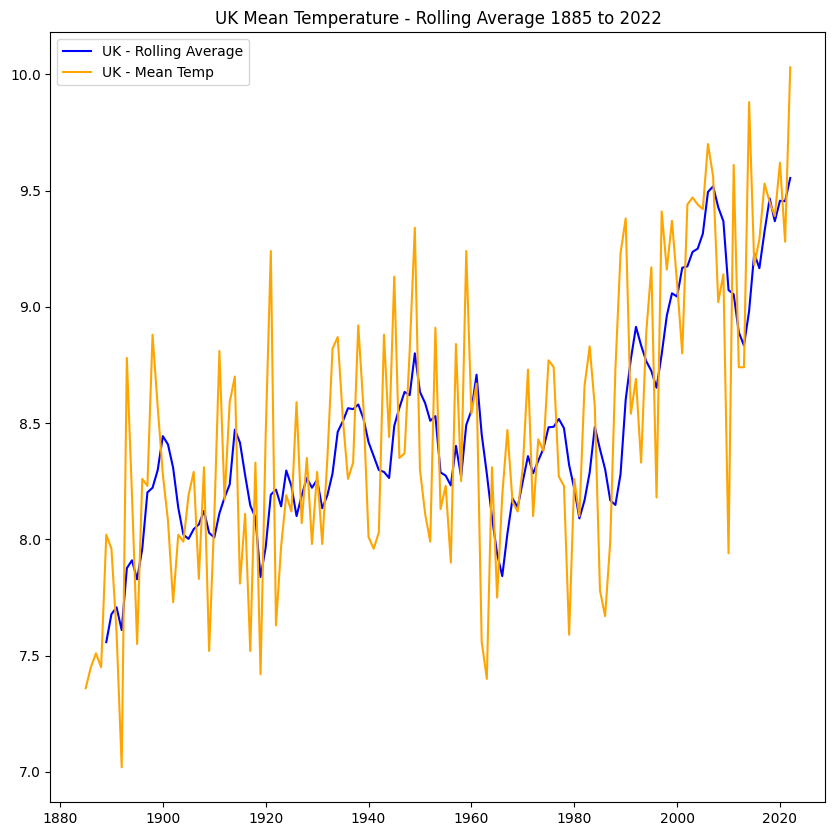

In [172]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(UK_df.year, UK_df.SMA_mean_temp, label = "UK - Rolling Average", color = "blue")
plt.plot(UK_df.year, UK_df.mean_temp, label = "UK - Mean Temp", color = 'orange')

plt.title("UK Mean Temperature - Rolling Average 1885 to 2022")
plt.legend()
plt.show()

England S change in mean temp with 5 year rolling average

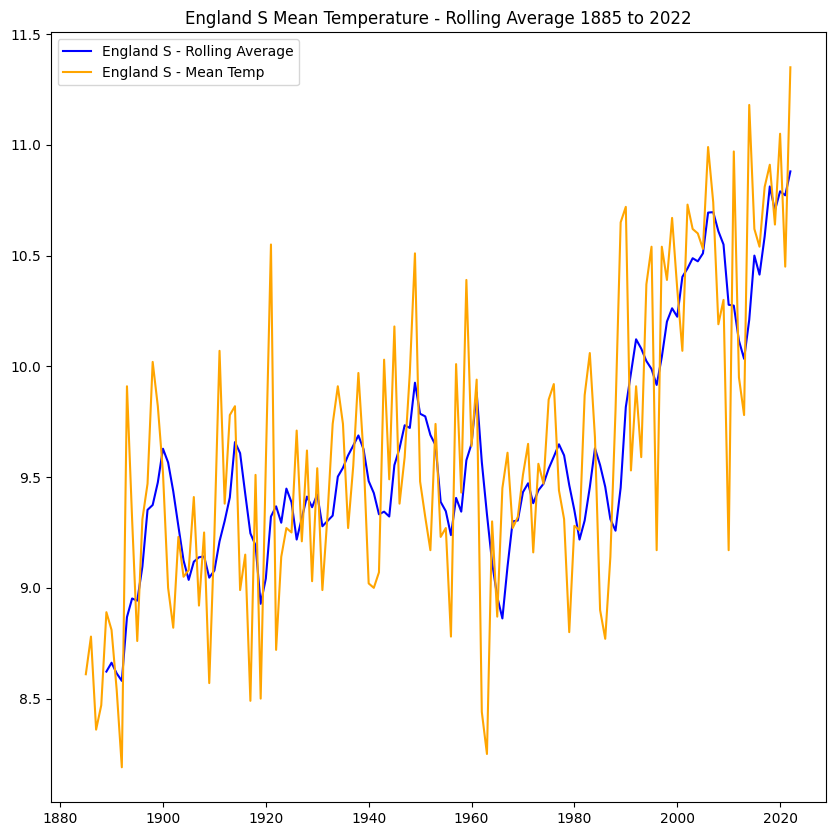

In [173]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(England_S_df.year, England_S_df.SMA_mean_temp, label = "England S - Rolling Average", color = "blue")
plt.plot(England_S_df.year, England_S_df.mean_temp, label = "England S - Mean Temp", color = 'orange')

plt.title("England S Mean Temperature - Rolling Average 1885 to 2022")
plt.legend()
plt.show()

Difference between mean temp over time in Egland S/N and Scotland

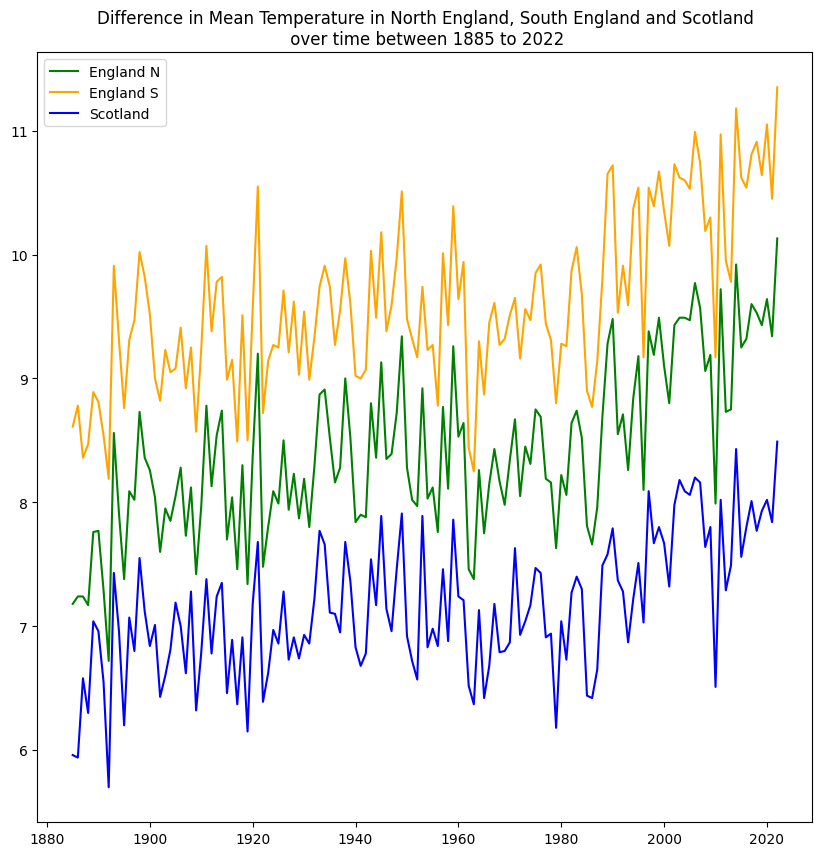

In [176]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(England_N_df.year, England_N_df.mean_temp, label = "England N", color = 'green')
plt.plot(England_S_df.year, England_S_df.mean_temp, label = "England S", color = 'orange')
plt.plot(Scotland_df.year, Scotland_df.mean_temp, label = "Scotland", color = 'blue')

plt.title("Difference in Mean Temperature in North England, South England and Scotland\n over time between 1885 to 2022")
plt.legend()
plt.show()

#Percentage increases between 1885 to 2022

In [177]:
annual_df_1885_2022 = annual_df[(annual_df["year"] == 1885) | (annual_df["year"] == 1985) | (annual_df["year"] == 2022)]
annual_df_1885_2022

,year,region,mean_temp,max_temp,total_rainfall
0,1885,England N,7.18,10.75,843.4
0,1885,England S,8.61,12.63,785.9
0,1885,Northern Ireland,7.81,11.58,893.2
0,1885,Scotland,5.96,9.33,1302.2
0,1885,Wales,7.57,11.14,1327.1
100,1985,England N,7.81,11.20,931.4
100,1985,England S,8.90,12.66,744.6
100,1985,Northern Ireland,7.94,11.33,1133.7
100,1985,Scotland,6.44,9.68,1503.4
100,1985,Wales,8.08,11.38,1408.3


Creating df for England N

In [178]:
England_N_df_1885_2022 = annual_df_1885_2022[annual_df_1885_2022['region'] == 'England N']

England_N_df_1885_2022 = England_N_df_1885_2022.T

England_N_df_1885_2022 = England_N_df_1885_2022.drop(['year', 'region'], axis=0)

England_N_df_1885_2022[0] = pd.to_numeric(England_N_df_1885_2022[0])
England_N_df_1885_2022[100] = pd.to_numeric(England_N_df_1885_2022[100])
England_N_df_1885_2022[137] = pd.to_numeric(England_N_df_1885_2022[137])

England_N_df_1885_2022['PI_1885_1985'] = (England_N_df_1885_2022[100] - England_N_df_1885_2022[0])*1 / England_N_df_1885_2022[0] * 100
England_N_df_1885_2022['PI_1985_2022'] = (England_N_df_1885_2022[137] - England_N_df_1885_2022[100])*1 / England_N_df_1885_2022[100] * 100
England_N_df_1885_2022['PI_1885_2022'] = (England_N_df_1885_2022[137] - England_N_df_1885_2022[0])*1 / England_N_df_1885_2022[0] * 100

England_N_df_1885_2022 = England_N_df_1885_2022.round({"PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

England_N_df_1885_2022 = England_N_df_1885_2022.rename(columns={0: "1885", 100: "1985", 137: "2022"})

England_N_df_1885_2022['region'] = 'England N'

column_to_move = England_N_df_1885_2022.pop('region')

England_N_df_1885_2022.insert(0, 'region', column_to_move)

England_N_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England N,7.18,7.81,10.13,8.8,29.7,41.1
max_temp,England N,10.75,11.20,14.00,4.2,25.0,30.2
total_rainfall,England N,843.40,931.40,912.00,10.4,-2.1,8.1


Creating df for England S

In [179]:
England_S_df_1885_2022 = annual_df_1885_2022[annual_df_1885_2022['region'] == 'England S']

England_S_df_1885_2022 = England_S_df_1885_2022.T

England_S_df_1885_2022 = England_S_df_1885_2022.drop(['year', 'region'], axis=0)

England_S_df_1885_2022[0] = pd.to_numeric(England_S_df_1885_2022[0])
England_S_df_1885_2022[100] = pd.to_numeric(England_S_df_1885_2022[100])
England_S_df_1885_2022[137] = pd.to_numeric(England_S_df_1885_2022[137])

England_S_df_1885_2022['PI_1885_1985'] = (England_S_df_1885_2022[100] - England_S_df_1885_2022[0])*1 / England_S_df_1885_2022[0] * 100
England_S_df_1885_2022['PI_1985_2022'] = (England_S_df_1885_2022[137] - England_S_df_1885_2022[100])*1 / England_S_df_1885_2022[100] * 100
England_S_df_1885_2022['PI_1885_2022'] = (England_S_df_1885_2022[137] - England_S_df_1885_2022[0])*1 / England_S_df_1885_2022[0] * 100

England_S_df_1885_2022 = England_S_df_1885_2022.round({"PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

England_S_df_1885_2022 = England_S_df_1885_2022.rename(columns={0: "1885", 100: "1985", 137: "2022"})

England_S_df_1885_2022['region'] = 'England S'

column_to_move = England_S_df_1885_2022.pop('region')

England_S_df_1885_2022.insert(0, 'region', column_to_move)

England_S_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England S,8.61,8.90,11.35,3.4,27.5,31.8
max_temp,England S,12.63,12.66,15.75,0.2,24.4,24.7
total_rainfall,England S,785.90,744.60,707.50,-5.3,-5.0,-10.0


Creating df for Scotland

In [180]:
Scotland_df_1885_2022 = annual_df_1885_2022[annual_df_1885_2022['region'] == 'Scotland']

Scotland_df_1885_2022 = Scotland_df_1885_2022.T

Scotland_df_1885_2022 = Scotland_df_1885_2022.drop(['year', 'region'], axis=0)

Scotland_df_1885_2022[0] = pd.to_numeric(Scotland_df_1885_2022[0])
Scotland_df_1885_2022[100] = pd.to_numeric(Scotland_df_1885_2022[100])
Scotland_df_1885_2022[137] = pd.to_numeric(Scotland_df_1885_2022[137])

Scotland_df_1885_2022['PI_1885_1985'] = (Scotland_df_1885_2022[100] - Scotland_df_1885_2022[0])*1 / Scotland_df_1885_2022[0] * 100
Scotland_df_1885_2022['PI_1985_2022'] = (Scotland_df_1885_2022[137] - Scotland_df_1885_2022[100])*1 / Scotland_df_1885_2022[100] * 100
Scotland_df_1885_2022['PI_1885_2022'] = (Scotland_df_1885_2022[137] - Scotland_df_1885_2022[0])*1 / Scotland_df_1885_2022[0] * 100

Scotland_df_1885_2022 = Scotland_df_1885_2022.round({"PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

Scotland_df_1885_2022 = Scotland_df_1885_2022.rename(columns={0: "1885", 100: "1985", 137: "2022"})

Scotland_df_1885_2022['region'] = 'Scotland'

column_to_move = Scotland_df_1885_2022.pop('region')

Scotland_df_1885_2022.insert(0, 'region', column_to_move)

Scotland_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Scotland,5.96,6.44,8.49,8.1,31.8,42.4
max_temp,Scotland,9.33,9.68,11.93,3.8,23.2,27.9
total_rainfall,Scotland,1302.20,1503.40,1552.10,15.5,3.2,19.2


Creating df for Wales

In [181]:
Wales_df_1885_2022 = annual_df_1885_2022[annual_df_1885_2022['region'] == 'Wales']

Wales_df_1885_2022 = Wales_df_1885_2022.T

Wales_df_1885_2022 = Wales_df_1885_2022.drop(['year', 'region'], axis=0)

Wales_df_1885_2022[0] = pd.to_numeric(Wales_df_1885_2022[0])
Wales_df_1885_2022[100] = pd.to_numeric(Wales_df_1885_2022[100])
Wales_df_1885_2022[137] = pd.to_numeric(Wales_df_1885_2022[137])

Wales_df_1885_2022['PI_1885_1985'] = (Wales_df_1885_2022[100] - Wales_df_1885_2022[0])*1 / Wales_df_1885_2022[0] * 100
Wales_df_1885_2022['PI_1985_2022'] = (Wales_df_1885_2022[137] - Wales_df_1885_2022[100])*1 / Wales_df_1885_2022[100] * 100
Wales_df_1885_2022['PI_1885_2022'] = (Wales_df_1885_2022[137] - Wales_df_1885_2022[0])*1 / Wales_df_1885_2022[0] * 100

Wales_df_1885_2022 = Wales_df_1885_2022.round({"PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

Wales_df_1885_2022 = Wales_df_1885_2022.rename(columns={0: "1885", 100: "1985", 137: "2022"})

Wales_df_1885_2022['region'] = 'Wales'

column_to_move = Wales_df_1885_2022.pop('region')

Wales_df_1885_2022.insert(0, 'region', column_to_move)

Wales_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Wales,7.57,8.08,10.22,6.7,26.5,35.0
max_temp,Wales,11.14,11.38,14.07,2.2,23.6,26.3
total_rainfall,Wales,1327.10,1408.30,1296.40,6.1,-7.9,-2.3


Creating df for N Ireland

In [182]:
N_Ireland_df_1885_2022 = annual_df_1885_2022[annual_df_1885_2022['region'] == 'Northern Ireland']

N_Ireland_df_1885_2022 = N_Ireland_df_1885_2022.T

N_Ireland_df_1885_2022 = N_Ireland_df_1885_2022.drop(['year', 'region'], axis=0)

N_Ireland_df_1885_2022[0] = pd.to_numeric(N_Ireland_df_1885_2022[0])
N_Ireland_df_1885_2022[100] = pd.to_numeric(N_Ireland_df_1885_2022[100])
N_Ireland_df_1885_2022[137] = pd.to_numeric(N_Ireland_df_1885_2022[137])

N_Ireland_df_1885_2022['PI_1885_1985'] = (N_Ireland_df_1885_2022[100] - N_Ireland_df_1885_2022[0])*1 / N_Ireland_df_1885_2022[0] * 100
N_Ireland_df_1885_2022['PI_1985_2022'] = (N_Ireland_df_1885_2022[137] - N_Ireland_df_1885_2022[100])*1 / N_Ireland_df_1885_2022[100] * 100
N_Ireland_df_1885_2022['PI_1885_2022'] = (N_Ireland_df_1885_2022[137] - N_Ireland_df_1885_2022[0])*1 / N_Ireland_df_1885_2022[0] * 100

N_Ireland_df_1885_2022 = N_Ireland_df_1885_2022.round({"PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

N_Ireland_df_1885_2022 = N_Ireland_df_1885_2022.rename(columns={0: "1885", 100: "1985", 137: "2022"})

N_Ireland_df_1885_2022['region'] = 'Northern Ireland'

column_to_move = N_Ireland_df_1885_2022.pop('region')

N_Ireland_df_1885_2022.insert(0, 'region', column_to_move)

N_Ireland_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Northern Ireland,7.81,7.94,9.83,1.7,23.8,25.9
max_temp,Northern Ireland,11.58,11.33,13.40,-2.2,18.3,15.7
total_rainfall,Northern Ireland,893.20,1133.70,1112.40,26.9,-1.9,24.5


Combined df of PI from 1885 to 2022

In [183]:
dfs2 = [England_N_df_1885_2022, England_S_df_1885_2022, Scotland_df_1885_2022, Wales_df_1885_2022, N_Ireland_df_1885_2022]
UK_df_1885_2022 = pd.concat(dfs2)
UK_df_1885_2022

,region,1885,1985,2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England N,7.18,7.81,10.13,8.8,29.7,41.1
max_temp,England N,10.75,11.20,14.00,4.2,25.0,30.2
total_rainfall,England N,843.40,931.40,912.00,10.4,-2.1,8.1
mean_temp,England S,8.61,8.90,11.35,3.4,27.5,31.8
max_temp,England S,12.63,12.66,15.75,0.2,24.4,24.7
total_rainfall,England S,785.90,744.60,707.50,-5.3,-5.0,-10.0
mean_temp,Scotland,5.96,6.44,8.49,8.1,31.8,42.4
max_temp,Scotland,9.33,9.68,11.93,3.8,23.2,27.9
total_rainfall,Scotland,1302.20,1503.40,1552.10,15.5,3.2,19.2
mean_temp,Wales,7.57,8.08,10.22,6.7,26.5,35.0


#Barplot showing mean temp difference between 1885-1985 and 1985-2022

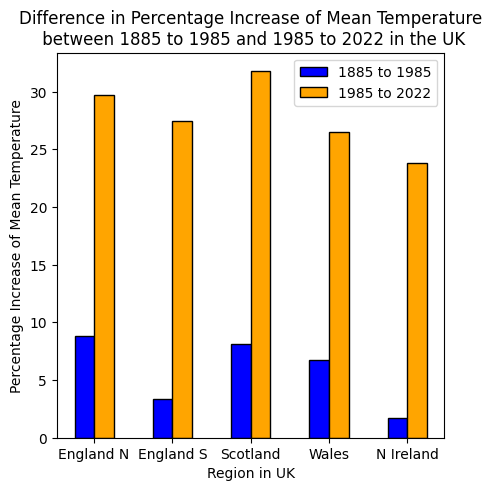

In [184]:
plt.rcParams["figure.figsize"] = (5, 5)

PI_mean_temp_1885_1985 = [8.8, 3.4, 8.1, 6.7, 1.7]
PI_mean_temp_1985_2022 = [29.7, 27.5, 31.8, 26.5, 23.8]

r = np.arange(5)

plt.bar(r, PI_mean_temp_1885_1985, color = 'blue',
        width = 0.25, edgecolor = 'black',
        label='1885 to 1985')

plt.bar(r + 0.25, PI_mean_temp_1985_2022, color = 'orange',
        width = 0.25, edgecolor = 'black',
        label='1985 to 2022')


plt.xlabel("Region in UK")
plt.ylabel("Percentage Increase of Mean Temperature")
plt.title("Difference in Percentage Increase of Mean Temperature\n between 1885 to 1985 and 1985 to 2022 in the UK")

plt.xticks(r + 0.25/2,['England N','England S','Scotland','Wales','N Ireland'])
plt.legend()

plt.show()

Could this be slighlty deceptive? Checking 5 year average for same time periods

In [185]:
annual_df_1885_2022_5_year = annual_df[(annual_df["year"] == 1885) | (annual_df["year"] == 1886)\
                                       | (annual_df["year"] == 1887) | (annual_df["year"] == 1888)\
                                       | (annual_df["year"] == 1889) | (annual_df["year"] == 1985)\
                                       | (annual_df["year"] == 1986) | (annual_df["year"] == 1987)\
                                       | (annual_df["year"] == 1988) | (annual_df["year"] == 1989)\
                                       | (annual_df["year"] == 2018) | (annual_df["year"] == 2019)\
                                       | (annual_df["year"] == 2020) | (annual_df["year"] == 2021)\
                                       | (annual_df["year"] == 2022)]
annual_df_1885_2022_5_year

,year,region,mean_temp,max_temp,total_rainfall
0,1885,England N,7.18,10.75,843.4
0,1885,England S,8.61,12.63,785.9
0,1885,Northern Ireland,7.81,11.58,893.2
0,1885,Scotland,5.96,9.33,1302.2
0,1885,Wales,7.57,11.14,1327.1
...,...,...,...,...,...
137,2022,England N,10.13,14.00,912.0
137,2022,England S,11.35,15.75,707.5
137,2022,Northern Ireland,9.83,13.40,1112.4
137,2022,Scotland,8.49,11.93,1552.1


England N

In [186]:
England_N_df_1885_2022_5_year = annual_df_1885_2022_5_year[annual_df_1885_2022_5_year['region'] == 'England N']

England_N_df_1885_2022_5_year = England_N_df_1885_2022_5_year.T

England_N_df_1885_2022_5_year = England_N_df_1885_2022_5_year.drop(['year', 'region'], axis=0)

England_N_df_1885_2022_5_year[0] = pd.to_numeric(England_N_df_1885_2022_5_year[0])
England_N_df_1885_2022_5_year[1] = pd.to_numeric(England_N_df_1885_2022_5_year[1])
England_N_df_1885_2022_5_year[2] = pd.to_numeric(England_N_df_1885_2022_5_year[2])
England_N_df_1885_2022_5_year[3] = pd.to_numeric(England_N_df_1885_2022_5_year[3])
England_N_df_1885_2022_5_year[4] = pd.to_numeric(England_N_df_1885_2022_5_year[4])
England_N_df_1885_2022_5_year[100] = pd.to_numeric(England_N_df_1885_2022_5_year[100])
England_N_df_1885_2022_5_year[101] = pd.to_numeric(England_N_df_1885_2022_5_year[101])
England_N_df_1885_2022_5_year[102] = pd.to_numeric(England_N_df_1885_2022_5_year[102])
England_N_df_1885_2022_5_year[103] = pd.to_numeric(England_N_df_1885_2022_5_year[103])
England_N_df_1885_2022_5_year[104] = pd.to_numeric(England_N_df_1885_2022_5_year[104])
England_N_df_1885_2022_5_year[133] = pd.to_numeric(England_N_df_1885_2022_5_year[133])
England_N_df_1885_2022_5_year[134] = pd.to_numeric(England_N_df_1885_2022_5_year[134])
England_N_df_1885_2022_5_year[135] = pd.to_numeric(England_N_df_1885_2022_5_year[135])
England_N_df_1885_2022_5_year[136] = pd.to_numeric(England_N_df_1885_2022_5_year[136])
England_N_df_1885_2022_5_year[137] = pd.to_numeric(England_N_df_1885_2022_5_year[137])

England_N_df_1885_2022_5_year['average_1885_1889'] = (England_N_df_1885_2022_5_year[0] + England_N_df_1885_2022_5_year[1]\
                                                      + England_N_df_1885_2022_5_year[2] + England_N_df_1885_2022_5_year[3]\
                                                      + England_N_df_1885_2022_5_year[4]) / 5
England_N_df_1885_2022_5_year['average_1985_1989'] = (England_N_df_1885_2022_5_year[100] + England_N_df_1885_2022_5_year[101]\
                                                      + England_N_df_1885_2022_5_year[102] + England_N_df_1885_2022_5_year[103]\
                                                      + England_N_df_1885_2022_5_year[104]) / 5
England_N_df_1885_2022_5_year['average_2018_2022'] = (England_N_df_1885_2022_5_year[133] + England_N_df_1885_2022_5_year[134]\
                                                      + England_N_df_1885_2022_5_year[135] + England_N_df_1885_2022_5_year[136]\
                                                      + England_N_df_1885_2022_5_year[137]) / 5

England_N_df_1885_2022_5_year['PI_1885_1985'] = (England_N_df_1885_2022_5_year['average_1985_1989'] - England_N_df_1885_2022_5_year['average_1885_1889'])*1 / England_N_df_1885_2022_5_year['average_1885_1889'] * 100
England_N_df_1885_2022_5_year['PI_1985_2022'] = (England_N_df_1885_2022_5_year['average_2018_2022'] - England_N_df_1885_2022_5_year['average_1985_1989'])*1 / England_N_df_1885_2022_5_year['average_1985_1989'] * 100
England_N_df_1885_2022_5_year['PI_1885_2022'] = (England_N_df_1885_2022_5_year['average_2018_2022'] - England_N_df_1885_2022_5_year['average_1885_1889'])*1 / England_N_df_1885_2022_5_year['average_1885_1889'] * 100

England_N_df_1885_2022_5_year = England_N_df_1885_2022_5_year.round({"average_1885_1889":1, "average_1985_1989":1, "average_2018_2022":1, "PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

England_N_df_1885_2022_5_year = England_N_df_1885_2022_5_year.rename(columns={0: "1885", 1: "1886", 2: "1887", 3: "1888", 4: "1889"\
                                                                             , 100: "1985", 101: "1986", 102: "1987", 103: "1988", 104: "1989"\
                                                                             , 133: "2018", 134: "2019", 135: "2020", 136: "2021", 137: "2022"})

England_N_df_1885_2022_5_year['region'] = 'England N'

column_to_move = England_N_df_1885_2022_5_year.pop('region')

England_N_df_1885_2022_5_year.insert(0, 'region', column_to_move)

England_N_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England N,7.18,7.24,7.24,7.17,7.76,7.81,7.66,7.96,8.69,...,9.43,9.64,9.34,10.13,7.3,8.3,9.6,13.1,16.1,31.4
max_temp,England N,10.75,10.61,11.00,10.66,11.27,11.20,11.17,11.30,12.09,...,13.10,13.32,13.01,14.00,10.9,11.8,13.3,8.3,13.4,22.9
total_rainfall,England N,843.40,1038.90,655.70,834.10,818.00,931.40,1035.10,982.80,993.80,...,1142.40,1134.00,1010.80,912.00,838.0,944.2,1015.2,12.7,7.5,21.1


England S

In [187]:
England_S_df_1885_2022_5_year = annual_df_1885_2022_5_year[annual_df_1885_2022_5_year['region'] == 'England S']

England_S_df_1885_2022_5_year = England_S_df_1885_2022_5_year.T

England_S_df_1885_2022_5_year = England_S_df_1885_2022_5_year.drop(['year', 'region'], axis=0)

England_S_df_1885_2022_5_year[0] = pd.to_numeric(England_S_df_1885_2022_5_year[0])
England_S_df_1885_2022_5_year[1] = pd.to_numeric(England_S_df_1885_2022_5_year[1])
England_S_df_1885_2022_5_year[2] = pd.to_numeric(England_S_df_1885_2022_5_year[2])
England_S_df_1885_2022_5_year[3] = pd.to_numeric(England_S_df_1885_2022_5_year[3])
England_S_df_1885_2022_5_year[4] = pd.to_numeric(England_S_df_1885_2022_5_year[4])
England_S_df_1885_2022_5_year[100] = pd.to_numeric(England_S_df_1885_2022_5_year[100])
England_S_df_1885_2022_5_year[101] = pd.to_numeric(England_S_df_1885_2022_5_year[101])
England_S_df_1885_2022_5_year[102] = pd.to_numeric(England_S_df_1885_2022_5_year[102])
England_S_df_1885_2022_5_year[103] = pd.to_numeric(England_S_df_1885_2022_5_year[103])
England_S_df_1885_2022_5_year[104] = pd.to_numeric(England_S_df_1885_2022_5_year[104])
England_S_df_1885_2022_5_year[133] = pd.to_numeric(England_S_df_1885_2022_5_year[133])
England_S_df_1885_2022_5_year[134] = pd.to_numeric(England_S_df_1885_2022_5_year[134])
England_S_df_1885_2022_5_year[135] = pd.to_numeric(England_S_df_1885_2022_5_year[135])
England_S_df_1885_2022_5_year[136] = pd.to_numeric(England_S_df_1885_2022_5_year[136])
England_S_df_1885_2022_5_year[137] = pd.to_numeric(England_S_df_1885_2022_5_year[137])

England_S_df_1885_2022_5_year['average_1885_1889'] = (England_S_df_1885_2022_5_year[0] + England_S_df_1885_2022_5_year[1]\
                                                      + England_S_df_1885_2022_5_year[2] + England_S_df_1885_2022_5_year[3]\
                                                      + England_S_df_1885_2022_5_year[4]) / 5
England_S_df_1885_2022_5_year['average_1985_1989'] = (England_S_df_1885_2022_5_year[100] + England_S_df_1885_2022_5_year[101]\
                                                      + England_S_df_1885_2022_5_year[102] + England_S_df_1885_2022_5_year[103]\
                                                      + England_S_df_1885_2022_5_year[104]) / 5
England_S_df_1885_2022_5_year['average_2018_2022'] = (England_S_df_1885_2022_5_year[133] + England_S_df_1885_2022_5_year[134]\
                                                      + England_S_df_1885_2022_5_year[135] + England_S_df_1885_2022_5_year[136]\
                                                      + England_S_df_1885_2022_5_year[137]) / 5

England_S_df_1885_2022_5_year['PI_1885_1985'] = (England_S_df_1885_2022_5_year['average_1985_1989'] - England_S_df_1885_2022_5_year['average_1885_1889'])*1 / England_S_df_1885_2022_5_year['average_1885_1889'] * 100
England_S_df_1885_2022_5_year['PI_1985_2022'] = (England_S_df_1885_2022_5_year['average_2018_2022'] - England_S_df_1885_2022_5_year['average_1985_1989'])*1 / England_S_df_1885_2022_5_year['average_1985_1989'] * 100
England_S_df_1885_2022_5_year['PI_1885_2022'] = (England_S_df_1885_2022_5_year['average_2018_2022'] - England_S_df_1885_2022_5_year['average_1885_1889'])*1 / England_S_df_1885_2022_5_year['average_1885_1889'] * 100

England_S_df_1885_2022_5_year = England_S_df_1885_2022_5_year.round({"average_1885_1889":1, "average_1985_1989":1, "average_2018_2022":1, "PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

England_S_df_1885_2022_5_year = England_S_df_1885_2022_5_year.rename(columns={0: "1885", 1: "1886", 2: "1887", 3: "1888", 4: "1889"\
                                                                             , 100: "1985", 101: "1986", 102: "1987", 103: "1988", 104: "1989"\
                                                                             , 133: "2018", 134: "2019", 135: "2020", 136: "2021", 137: "2022"})

England_S_df_1885_2022_5_year['region'] = 'England S'

column_to_move = England_S_df_1885_2022_5_year.pop('region')

England_S_df_1885_2022_5_year.insert(0, 'region', column_to_move)

England_S_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England S,8.61,8.78,8.36,8.47,8.89,8.90,8.77,9.14,9.80,...,10.64,11.05,10.45,11.35,8.6,9.5,10.9,9.6,15.1,26.2
max_temp,England S,12.63,12.73,12.69,12.34,12.84,12.66,12.63,12.82,13.53,...,14.79,15.18,14.37,15.75,12.6,13.3,15.0,5.2,13.0,18.9
total_rainfall,England S,785.90,847.80,566.30,754.30,712.80,744.60,836.90,774.60,761.90,...,893.00,913.20,806.40,707.50,733.4,766.6,814.4,4.5,6.2,11.0


Scotland

In [188]:
Scotland_df_1885_2022_5_year = annual_df_1885_2022_5_year[annual_df_1885_2022_5_year['region'] == 'Scotland']

Scotland_df_1885_2022_5_year = Scotland_df_1885_2022_5_year.T

Scotland_df_1885_2022_5_year = Scotland_df_1885_2022_5_year.drop(['year', 'region'], axis=0)

Scotland_df_1885_2022_5_year[0] = pd.to_numeric(Scotland_df_1885_2022_5_year[0])
Scotland_df_1885_2022_5_year[1] = pd.to_numeric(Scotland_df_1885_2022_5_year[1])
Scotland_df_1885_2022_5_year[2] = pd.to_numeric(Scotland_df_1885_2022_5_year[2])
Scotland_df_1885_2022_5_year[3] = pd.to_numeric(Scotland_df_1885_2022_5_year[3])
Scotland_df_1885_2022_5_year[4] = pd.to_numeric(Scotland_df_1885_2022_5_year[4])
Scotland_df_1885_2022_5_year[100] = pd.to_numeric(Scotland_df_1885_2022_5_year[100])
Scotland_df_1885_2022_5_year[101] = pd.to_numeric(Scotland_df_1885_2022_5_year[101])
Scotland_df_1885_2022_5_year[102] = pd.to_numeric(Scotland_df_1885_2022_5_year[102])
Scotland_df_1885_2022_5_year[103] = pd.to_numeric(Scotland_df_1885_2022_5_year[103])
Scotland_df_1885_2022_5_year[104] = pd.to_numeric(Scotland_df_1885_2022_5_year[104])
Scotland_df_1885_2022_5_year[133] = pd.to_numeric(Scotland_df_1885_2022_5_year[133])
Scotland_df_1885_2022_5_year[134] = pd.to_numeric(Scotland_df_1885_2022_5_year[134])
Scotland_df_1885_2022_5_year[135] = pd.to_numeric(Scotland_df_1885_2022_5_year[135])
Scotland_df_1885_2022_5_year[136] = pd.to_numeric(Scotland_df_1885_2022_5_year[136])
Scotland_df_1885_2022_5_year[137] = pd.to_numeric(Scotland_df_1885_2022_5_year[137])

Scotland_df_1885_2022_5_year['average_1885_1889'] = (Scotland_df_1885_2022_5_year[0] + Scotland_df_1885_2022_5_year[1]\
                                                      + Scotland_df_1885_2022_5_year[2] + Scotland_df_1885_2022_5_year[3]\
                                                      + Scotland_df_1885_2022_5_year[4]) / 5
Scotland_df_1885_2022_5_year['average_1985_1989'] = (Scotland_df_1885_2022_5_year[100] + Scotland_df_1885_2022_5_year[101]\
                                                      + Scotland_df_1885_2022_5_year[102] + Scotland_df_1885_2022_5_year[103]\
                                                      + Scotland_df_1885_2022_5_year[104]) / 5
Scotland_df_1885_2022_5_year['average_2018_2022'] = (Scotland_df_1885_2022_5_year[133] + Scotland_df_1885_2022_5_year[134]\
                                                      + Scotland_df_1885_2022_5_year[135] + Scotland_df_1885_2022_5_year[136]\
                                                      + Scotland_df_1885_2022_5_year[137]) / 5

Scotland_df_1885_2022_5_year['PI_1885_1985'] = (Scotland_df_1885_2022_5_year['average_1985_1989'] - Scotland_df_1885_2022_5_year['average_1885_1889'])*1 / Scotland_df_1885_2022_5_year['average_1885_1889'] * 100
Scotland_df_1885_2022_5_year['PI_1985_2022'] = (Scotland_df_1885_2022_5_year['average_2018_2022'] - Scotland_df_1885_2022_5_year['average_1985_1989'])*1 / Scotland_df_1885_2022_5_year['average_1985_1989'] * 100
Scotland_df_1885_2022_5_year['PI_1885_2022'] = (Scotland_df_1885_2022_5_year['average_2018_2022'] - Scotland_df_1885_2022_5_year['average_1885_1889'])*1 / Scotland_df_1885_2022_5_year['average_1885_1889'] * 100

Scotland_df_1885_2022_5_year = Scotland_df_1885_2022_5_year.round({"average_1885_1889":1, "average_1985_1989":1, "average_2018_2022":1, "PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

Scotland_df_1885_2022_5_year = Scotland_df_1885_2022_5_year.rename(columns={0: "1885", 1: "1886", 2: "1887", 3: "1888", 4: "1889"\
                                                                             , 100: "1985", 101: "1986", 102: "1987", 103: "1988", 104: "1989"\
                                                                             , 133: "2018", 134: "2019", 135: "2020", 136: "2021", 137: "2022"})

Scotland_df_1885_2022_5_year['region'] = 'Scotland'

column_to_move = Scotland_df_1885_2022_5_year.pop('region')

Scotland_df_1885_2022_5_year.insert(0, 'region', column_to_move)

Scotland_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Scotland,5.96,5.94,6.58,6.3,7.04,6.44,6.42,6.65,7.49,...,7.93,8.02,7.84,8.49,6.4,6.9,8.0,8.7,15.8,25.9
max_temp,Scotland,9.33,9.27,10.16,9.7,10.42,9.68,9.68,9.90,10.67,...,11.31,11.43,11.28,11.93,9.8,10.2,11.4,4.2,12.2,17.0
total_rainfall,Scotland,1302.20,1275.50,1120.80,1273.3,1169.80,1503.40,1636.70,1350.80,1593.40,...,1558.90,1801.70,1387.40,1552.10,1228.3,1514.7,1539.1,23.3,1.6,25.3


Wales

In [189]:
Wales_df_1885_2022_5_year = annual_df_1885_2022_5_year[annual_df_1885_2022_5_year['region'] == 'Wales']

Wales_df_1885_2022_5_year = Wales_df_1885_2022_5_year.T

Wales_df_1885_2022_5_year = Wales_df_1885_2022_5_year.drop(['year', 'region'], axis=0)

Wales_df_1885_2022_5_year[0] = pd.to_numeric(Wales_df_1885_2022_5_year[0])
Wales_df_1885_2022_5_year[1] = pd.to_numeric(Wales_df_1885_2022_5_year[1])
Wales_df_1885_2022_5_year[2] = pd.to_numeric(Wales_df_1885_2022_5_year[2])
Wales_df_1885_2022_5_year[3] = pd.to_numeric(Wales_df_1885_2022_5_year[3])
Wales_df_1885_2022_5_year[4] = pd.to_numeric(Wales_df_1885_2022_5_year[4])
Wales_df_1885_2022_5_year[100] = pd.to_numeric(Wales_df_1885_2022_5_year[100])
Wales_df_1885_2022_5_year[101] = pd.to_numeric(Wales_df_1885_2022_5_year[101])
Wales_df_1885_2022_5_year[102] = pd.to_numeric(Wales_df_1885_2022_5_year[102])
Wales_df_1885_2022_5_year[103] = pd.to_numeric(Wales_df_1885_2022_5_year[103])
Wales_df_1885_2022_5_year[104] = pd.to_numeric(Wales_df_1885_2022_5_year[104])
Wales_df_1885_2022_5_year[133] = pd.to_numeric(Wales_df_1885_2022_5_year[133])
Wales_df_1885_2022_5_year[134] = pd.to_numeric(Wales_df_1885_2022_5_year[134])
Wales_df_1885_2022_5_year[135] = pd.to_numeric(Wales_df_1885_2022_5_year[135])
Wales_df_1885_2022_5_year[136] = pd.to_numeric(Wales_df_1885_2022_5_year[136])
Wales_df_1885_2022_5_year[137] = pd.to_numeric(Wales_df_1885_2022_5_year[137])

Wales_df_1885_2022_5_year['average_1885_1889'] = (Wales_df_1885_2022_5_year[0] + Wales_df_1885_2022_5_year[1]\
                                                      + Wales_df_1885_2022_5_year[2] + Wales_df_1885_2022_5_year[3]\
                                                      + Wales_df_1885_2022_5_year[4]) / 5
Wales_df_1885_2022_5_year['average_1985_1989'] = (Wales_df_1885_2022_5_year[100] + Wales_df_1885_2022_5_year[101]\
                                                      + Wales_df_1885_2022_5_year[102] + Wales_df_1885_2022_5_year[103]\
                                                      + Wales_df_1885_2022_5_year[104]) / 5
Wales_df_1885_2022_5_year['average_2018_2022'] = (Wales_df_1885_2022_5_year[133] + Wales_df_1885_2022_5_year[134]\
                                                      + Wales_df_1885_2022_5_year[135] + Wales_df_1885_2022_5_year[136]\
                                                      + Wales_df_1885_2022_5_year[137]) / 5

Wales_df_1885_2022_5_year['PI_1885_1985'] = (Wales_df_1885_2022_5_year['average_1985_1989'] - Wales_df_1885_2022_5_year['average_1885_1889'])*1 / Wales_df_1885_2022_5_year['average_1885_1889'] * 100
Wales_df_1885_2022_5_year['PI_1985_2022'] = (Wales_df_1885_2022_5_year['average_2018_2022'] - Wales_df_1885_2022_5_year['average_1985_1989'])*1 / Wales_df_1885_2022_5_year['average_1985_1989'] * 100
Wales_df_1885_2022_5_year['PI_1885_2022'] = (Wales_df_1885_2022_5_year['average_2018_2022'] - Wales_df_1885_2022_5_year['average_1885_1889'])*1 / Wales_df_1885_2022_5_year['average_1885_1889'] * 100

Wales_df_1885_2022_5_year = Wales_df_1885_2022_5_year.round({"average_1885_1889":1, "average_1985_1989":1, "average_2018_2022":1, "PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

Wales_df_1885_2022_5_year = Wales_df_1885_2022_5_year.rename(columns={0: "1885", 1: "1886", 2: "1887", 3: "1888", 4: "1889"\
                                                                             , 100: "1985", 101: "1986", 102: "1987", 103: "1988", 104: "1989"\
                                                                             , 133: "2018", 134: "2019", 135: "2020", 136: "2021", 137: "2022"})

Wales_df_1885_2022_5_year['region'] = 'Wales'

column_to_move = Wales_df_1885_2022_5_year.pop('region')

Wales_df_1885_2022_5_year.insert(0, 'region', column_to_move)

Wales_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Wales,7.57,7.86,7.52,7.67,8.16,8.08,7.88,8.27,9.00,...,9.67,9.92,9.63,10.22,7.8,8.6,9.8,10.4,14.8,26.7
max_temp,Wales,11.14,11.38,11.53,11.20,11.71,11.38,11.22,11.59,12.31,...,13.20,13.52,13.19,14.07,11.4,12.0,13.5,5.0,12.7,18.3
total_rainfall,Wales,1327.10,1543.40,963.10,1248.40,1108.70,1408.30,1568.60,1362.30,1480.60,...,1603.40,1746.90,1497.20,1296.40,1238.1,1433.6,1502.6,15.8,4.8,21.4


Northern Ireland

In [190]:
N_Ireland_df_1885_2022_5_year = annual_df_1885_2022_5_year[annual_df_1885_2022_5_year['region'] == 'Northern Ireland']

N_Ireland_df_1885_2022_5_year = N_Ireland_df_1885_2022_5_year.T

N_Ireland_df_1885_2022_5_year = N_Ireland_df_1885_2022_5_year.drop(['year', 'region'], axis=0)

N_Ireland_df_1885_2022_5_year[0] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[0])
N_Ireland_df_1885_2022_5_year[1] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[1])
N_Ireland_df_1885_2022_5_year[2] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[2])
N_Ireland_df_1885_2022_5_year[3] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[3])
N_Ireland_df_1885_2022_5_year[4] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[4])
N_Ireland_df_1885_2022_5_year[100] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[100])
N_Ireland_df_1885_2022_5_year[101] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[101])
N_Ireland_df_1885_2022_5_year[102] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[102])
N_Ireland_df_1885_2022_5_year[103] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[103])
N_Ireland_df_1885_2022_5_year[104] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[104])
N_Ireland_df_1885_2022_5_year[133] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[133])
N_Ireland_df_1885_2022_5_year[134] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[134])
N_Ireland_df_1885_2022_5_year[135] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[135])
N_Ireland_df_1885_2022_5_year[136] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[136])
N_Ireland_df_1885_2022_5_year[137] = pd.to_numeric(N_Ireland_df_1885_2022_5_year[137])

N_Ireland_df_1885_2022_5_year['average_1885_1889'] = (N_Ireland_df_1885_2022_5_year[0] + N_Ireland_df_1885_2022_5_year[1]\
                                                      + N_Ireland_df_1885_2022_5_year[2] + N_Ireland_df_1885_2022_5_year[3]\
                                                      + N_Ireland_df_1885_2022_5_year[4]) / 5
N_Ireland_df_1885_2022_5_year['average_1985_1989'] = (N_Ireland_df_1885_2022_5_year[100] + N_Ireland_df_1885_2022_5_year[101]\
                                                      + N_Ireland_df_1885_2022_5_year[102] + N_Ireland_df_1885_2022_5_year[103]\
                                                      + N_Ireland_df_1885_2022_5_year[104]) / 5
N_Ireland_df_1885_2022_5_year['average_2018_2022'] = (N_Ireland_df_1885_2022_5_year[133] + N_Ireland_df_1885_2022_5_year[134]\
                                                      + N_Ireland_df_1885_2022_5_year[135] + N_Ireland_df_1885_2022_5_year[136]\
                                                      + N_Ireland_df_1885_2022_5_year[137]) / 5

N_Ireland_df_1885_2022_5_year['PI_1885_1985'] = (N_Ireland_df_1885_2022_5_year['average_1985_1989'] - N_Ireland_df_1885_2022_5_year['average_1885_1889'])*1 / N_Ireland_df_1885_2022_5_year['average_1885_1889'] * 100
N_Ireland_df_1885_2022_5_year['PI_1985_2022'] = (N_Ireland_df_1885_2022_5_year['average_2018_2022'] - N_Ireland_df_1885_2022_5_year['average_1985_1989'])*1 / N_Ireland_df_1885_2022_5_year['average_1985_1989'] * 100
N_Ireland_df_1885_2022_5_year['PI_1885_2022'] = (N_Ireland_df_1885_2022_5_year['average_2018_2022'] - N_Ireland_df_1885_2022_5_year['average_1885_1889'])*1 / N_Ireland_df_1885_2022_5_year['average_1885_1889'] * 100

N_Ireland_df_1885_2022_5_year = N_Ireland_df_1885_2022_5_year.round({"average_1885_1889":1, "average_1985_1989":1, "average_2018_2022":1, "PI_1885_1985":1, "PI_1985_2022":1, "PI_1885_2022":1})

N_Ireland_df_1885_2022_5_year = N_Ireland_df_1885_2022_5_year.rename(columns={0: "1885", 1: "1886", 2: "1887", 3: "1888", 4: "1889"\
                                                                             , 100: "1985", 101: "1986", 102: "1987", 103: "1988", 104: "1989"\
                                                                             , 133: "2018", 134: "2019", 135: "2020", 136: "2021", 137: "2022"})

N_Ireland_df_1885_2022_5_year['region'] = 'Northern Ireland'

column_to_move = N_Ireland_df_1885_2022_5_year.pop('region')

N_Ireland_df_1885_2022_5_year.insert(0, 'region', column_to_move)

N_Ireland_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,Northern Ireland,7.81,7.79,8.32,8.17,8.67,7.94,7.72,8.24,8.82,...,9.35,9.28,9.54,9.83,8.2,8.4,9.4,2.6,12.8,15.8
max_temp,Northern Ireland,11.58,11.41,12.20,11.79,12.09,11.33,11.13,11.64,12.15,...,12.76,12.83,13.08,13.40,11.8,11.8,13.0,-0.2,10.0,9.8
total_rainfall,Northern Ireland,893.20,1127.10,788.70,1032.30,1042.80,1133.70,1198.50,983.00,1242.20,...,1209.70,1323.60,1054.60,1112.40,976.8,1109.5,1155.6,13.6,4.2,18.3


In [191]:
dfs3 = [England_N_df_1885_2022_5_year, England_S_df_1885_2022_5_year, Scotland_df_1885_2022_5_year, Wales_df_1885_2022_5_year, N_Ireland_df_1885_2022_5_year]
UK_df_1885_2022_5_year = pd.concat(dfs3)
UK_df_1885_2022_5_year

,region,1885,1886,1887,1888,1889,1985,1986,1987,1988,...,2019,2020,2021,2022,average_1885_1889,average_1985_1989,average_2018_2022,PI_1885_1985,PI_1985_2022,PI_1885_2022
mean_temp,England N,7.18,7.24,7.24,7.17,7.76,7.81,7.66,7.96,8.69,...,9.43,9.64,9.34,10.13,7.3,8.3,9.6,13.1,16.1,31.4
max_temp,England N,10.75,10.61,11.00,10.66,11.27,11.20,11.17,11.30,12.09,...,13.10,13.32,13.01,14.00,10.9,11.8,13.3,8.3,13.4,22.9
total_rainfall,England N,843.40,1038.90,655.70,834.10,818.00,931.40,1035.10,982.80,993.80,...,1142.40,1134.00,1010.80,912.00,838.0,944.2,1015.2,12.7,7.5,21.1
mean_temp,England S,8.61,8.78,8.36,8.47,8.89,8.90,8.77,9.14,9.80,...,10.64,11.05,10.45,11.35,8.6,9.5,10.9,9.6,15.1,26.2
max_temp,England S,12.63,12.73,12.69,12.34,12.84,12.66,12.63,12.82,13.53,...,14.79,15.18,14.37,15.75,12.6,13.3,15.0,5.2,13.0,18.9
total_rainfall,England S,785.90,847.80,566.30,754.30,712.80,744.60,836.90,774.60,761.90,...,893.00,913.20,806.40,707.50,733.4,766.6,814.4,4.5,6.2,11.0
mean_temp,Scotland,5.96,5.94,6.58,6.30,7.04,6.44,6.42,6.65,7.49,...,7.93,8.02,7.84,8.49,6.4,6.9,8.0,8.7,15.8,25.9
max_temp,Scotland,9.33,9.27,10.16,9.70,10.42,9.68,9.68,9.90,10.67,...,11.31,11.43,11.28,11.93,9.8,10.2,11.4,4.2,12.2,17.0
total_rainfall,Scotland,1302.20,1275.50,1120.80,1273.30,1169.80,1503.40,1636.70,1350.80,1593.40,...,1558.90,1801.70,1387.40,1552.10,1228.3,1514.7,1539.1,23.3,1.6,25.3
mean_temp,Wales,7.57,7.86,7.52,7.67,8.16,8.08,7.88,8.27,9.00,...,9.67,9.92,9.63,10.22,7.8,8.6,9.8,10.4,14.8,26.7


#Barplot showing difference in PI between 1885-1889 to 1985-1989 and 1985-1989 to 2018-2022

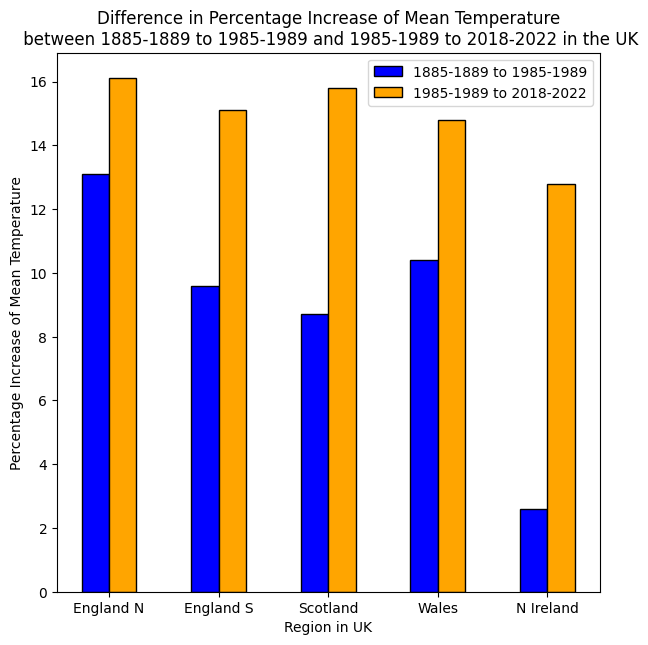

In [192]:
plt.rcParams["figure.figsize"] = (7, 7)

PI_mean_temp_1885_1985_5_year = [13.1, 9.6, 8.7, 10.4, 2.6]
PI_mean_temp_1985_2022_5_year = [16.1, 15.1, 15.8, 14.8, 12.8]

r = np.arange(5)

plt.bar(r, PI_mean_temp_1885_1985_5_year, color = 'blue',
        width = 0.25, edgecolor = 'black',
        label='1885-1889 to 1985-1989')

plt.bar(r + 0.25, PI_mean_temp_1985_2022_5_year, color = 'orange',
        width = 0.25, edgecolor = 'black',
        label='1985-1989 to 2018-2022')


plt.xlabel("Region in UK")
plt.ylabel("Percentage Increase of Mean Temperature")
plt.title("Difference in Percentage Increase of Mean Temperature\n between 1885-1889 to 1985-1989 and 1985-1989 to 2018-2022 in the UK")

plt.xticks(r + 0.25/2,['England N','England S','Scotland','Wales','N Ireland'])
plt.legend()

plt.show()

#Machine Learning Forecasting

UK Mean Temperature

In [281]:
UK_df.tail(10)

,year,region,mean_temp,max_temp,total_rainfall,SMA_mean_temp
128,2013,UK,8.74,12.36,1084.0,8.834
129,2014,UK,9.88,13.54,1292.8,8.982
130,2015,UK,9.18,12.93,1265.3,9.230
131,2016,UK,9.29,12.96,1096.5,9.166
132,2017,UK,9.53,13.12,1118.4,9.324
133,2018,UK,9.45,13.24,1053.5,9.466
134,2019,UK,9.39,13.10,1232.2,9.368
135,2020,UK,9.62,13.35,1334.1,9.456
136,2021,UK,9.28,12.95,1104.4,9.454
137,2022,UK,10.03,13.92,1090.4,9.554


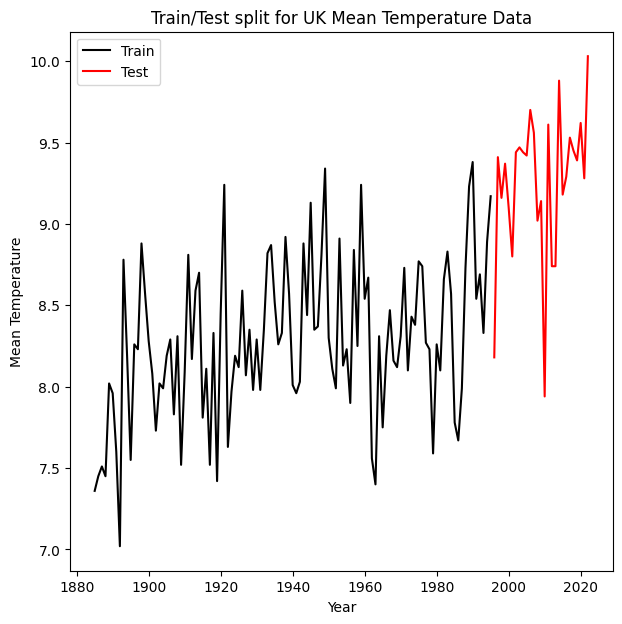

In [257]:
train = UK_df['mean_temp'][UK_df['year'] < 1996]
test = UK_df['mean_temp'][UK_df['year'] > 1995]

plt.plot(UK_df.year[UK_df.year < 1996], train, label = 'Train', color = "black")
plt.plot(UK_df.year[UK_df.year > 1995], test, label = 'Test', color = "red")

plt.ylabel('Mean Temperature')
plt.xlabel('Year')

plt.title("Train/Test split for UK Mean Temperature Data")
plt.legend()
plt.show()

In [258]:
train

0      7.36
1      7.45
2      7.51
3      7.45
4      8.02
       ... 
106    8.54
107    8.69
108    8.33
109    8.89
110    9.17
Name: mean_temp, Length: 111, dtype: float64

ARMA Model

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


ARMAmodel = SARIMAX(train, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [260]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

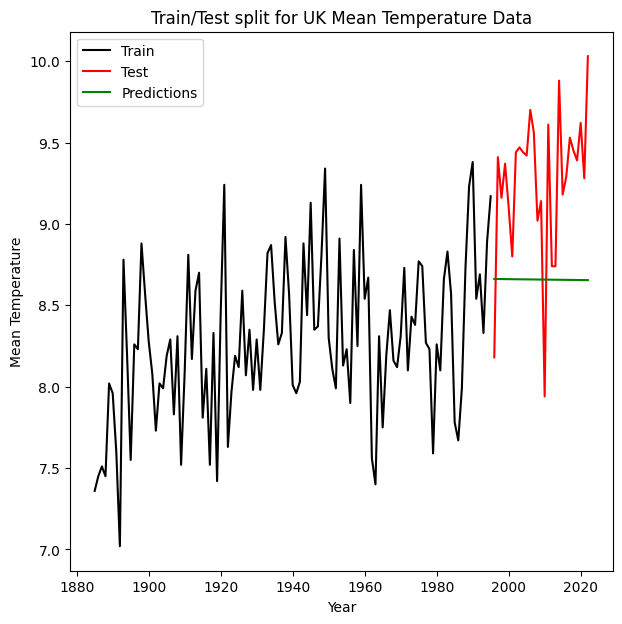

In [261]:
plt.plot(UK_df.year[UK_df.year < 1996], train, label = 'Train', color = "black")
plt.plot(UK_df.year[UK_df.year > 1995], test, label = 'Test', color = "red")
plt.plot(UK_df.year[UK_df.year > 1995], y_pred_out, color='green', label = 'Predictions')

plt.ylabel('Mean Temperature')
plt.xlabel('Year')

plt.title("Train/Test split for UK Mean Temperature Data")
plt.legend()
plt.show()

In [262]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.7509619225390329


ARIMA model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


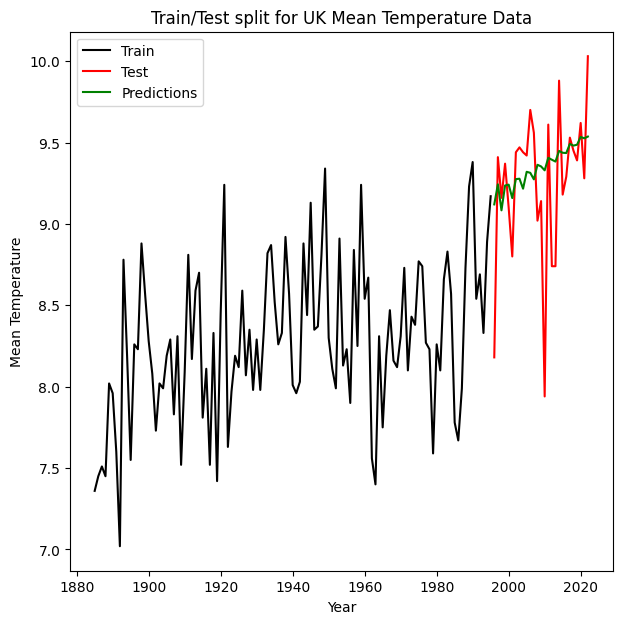

In [306]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(train, order = (3, 2, 3))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(UK_df.year[UK_df.year < 1996], train, label = 'Train', color = "black")
plt.plot(UK_df.year[UK_df.year > 1995], test, label = 'Test', color = "red")
plt.plot(UK_df.year[UK_df.year > 1995], y_pred_out, color='green', label = 'Predictions')

plt.ylabel('Mean Temperature')
plt.xlabel('Year')

plt.title("Train/Test split for UK Mean Temperature Data")
plt.legend()
plt.show()

In [307]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.43079094767392023


Creating future prediction using ARIMA model

In [308]:
data = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
        2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
        2044, 2045, 2046, 2047, 2048, 2049, 2050]

forecasting_df = pd.DataFrame(data, columns=['year'])

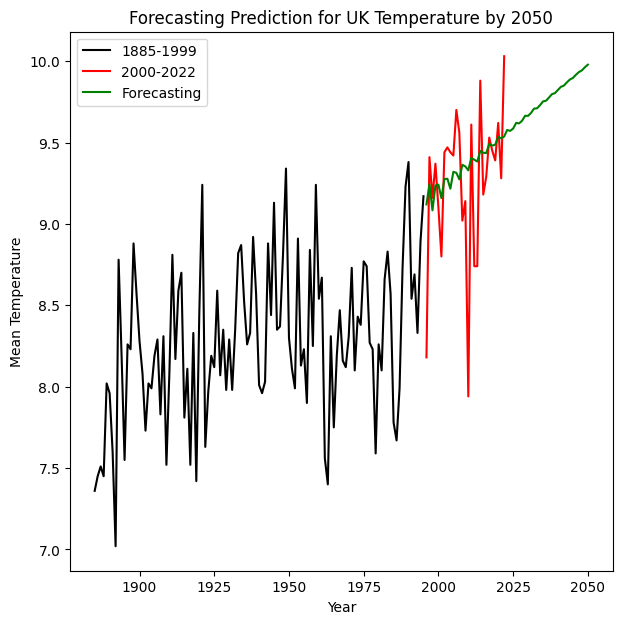

In [309]:
y_pred = ARIMAmodel.get_forecast(len(forecasting_df.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = forecasting_df.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(UK_df.year[UK_df.year < 1996], train, label = '1885-1995', color = "black")
plt.plot(UK_df.year[UK_df.year > 1995], test, label = '1996-2022', color = "red")
plt.plot(forecasting_df.year, y_pred_out, color='green', label = 'Forecasting')

plt.ylabel('Mean Temperature')
plt.xlabel('Year')

plt.title("Forecasting Prediction for UK Temperature by 2050")
plt.legend()
plt.show()

In [330]:
UK_forecasting_df = forecasting_df[27:].copy()

UK_forecasting_df['mean_temp'] = round(y_pred_out, 2)

UK_forecasting_df.head(10)

,year,mean_temp
27,2023,9.58
28,2024,9.57
29,2025,9.59
30,2026,9.62
31,2027,9.62
32,2028,9.63
33,2029,9.66
34,2030,9.66
35,2031,9.68
36,2032,9.71


UK Mean Temperature Rolling Average Forecast

Combining UK Mean Temperature Actual and Forecast

In [331]:
UK_mean_temp = UK_df[['year', 'mean_temp']]
UK_mean_temp

,year,mean_temp
0,1885,7.36
1,1886,7.45
2,1887,7.51
3,1888,7.45
4,1889,8.02
...,...,...
133,2018,9.45
134,2019,9.39
135,2020,9.62
136,2021,9.28


In [332]:
UK_mean_temp_with_forecast = UK_mean_temp.append(UK_forecasting_df)
UK_mean_temp_with_forecast.tail()

<ipython-input-332-212e3a8660be>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  UK_mean_temp_with_forecast = UK_mean_temp.append(UK_forecasting_df)


,year,mean_temp
50,2046,9.92
51,2047,9.93
52,2048,9.94
53,2049,9.96
54,2050,9.98


Calculating rolling averages

In [333]:
UK_mean_temp_with_forecast['SMA_mean_temp'] = UK_mean_temp_with_forecast['mean_temp'].rolling(5).mean()
UK_mean_temp_with_forecast

,year,mean_temp,SMA_mean_temp
0,1885,7.36,NaN
1,1886,7.45,NaN
2,1887,7.51,NaN
3,1888,7.45,NaN
4,1889,8.02,7.558
...,...,...,...
50,2046,9.92,9.886
51,2047,9.93,9.902
52,2048,9.94,9.916
53,2049,9.96,9.930


Forecast rolling average line graph

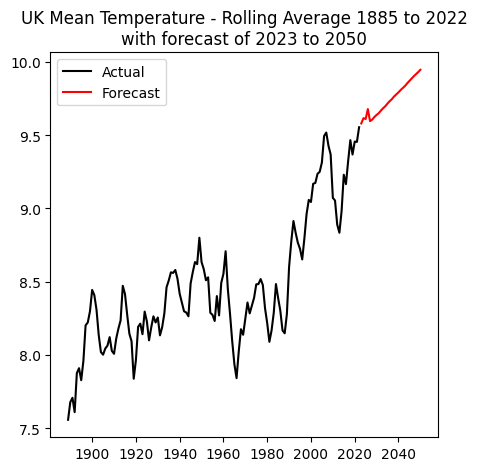

In [334]:
plt.rcParams["figure.figsize"] = (5, 5)

plt.plot(UK_mean_temp_with_forecast.year[UK_mean_temp_with_forecast.year < 2023], UK_mean_temp_with_forecast.SMA_mean_temp[UK_mean_temp_with_forecast.year < 2023], label = "Actual", color = "black")
plt.plot(UK_mean_temp_with_forecast.year[UK_mean_temp_with_forecast.year > 2022], UK_mean_temp_with_forecast.SMA_mean_temp[UK_mean_temp_with_forecast.year > 2022], label = "Forecast", color = "red")

plt.title("UK Mean Temperature - Rolling Average 1885 to 2022\nwith forecast of 2023 to 2050")
plt.legend()
plt.show()